<a href="https://colab.research.google.com/github/vladislavlisin/Stylometry_Extra/blob/main/Stylometry_extra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Смотрим на данные**

In [ ]:
# работаем в google colab
# подключаем гугл диск с данными
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd 
import numpy as np

corpus = pd.read_csv("/content/drive/MyDrive/poems_ok.csv", delimiter=',', encoding='utf-8')

corpus.head()

,index,author,name,year,text
0,0,Пушкин,NaN,0,"Когда сожмешь ты снова руку,\nКоторая тебе дар..."
1,1,Пушкин,NaN,0,"Тебя ль я видел, милый друг?\nИли неверное то ..."
2,2,Пушкин,NaN,0,"Когда, к мечтательному миру\nСтремясь возвышен..."
3,3,Пушкин,NaN,0,Его стихов пленительная сладость\nПройдет веко...
4,4,Пушкин,NaN,0,"Бессмертною рукой раздавленный зоил,\nПозорног..."


In [ ]:
corpus['text'][0]

'Когда сожмешь ты снова руку,\nКоторая тебе дарит\nНа скучный путь и на разлуку\nСвятую Библию Харит?\nАмур нашел ее в Цитере,\nВ архиве Шалости младой.\nПо ней молись своей Венере\nБлагочестивою душой.\nПрости, эпикуреец мой!\nОстанься век, каков ты ныне,\nЛети во мрачный Альбион!\nДа сохранят тебя в чужбине\nХристос и верный Купидон!\nНеси в чужой предел Пената,\nНо, помня прежни дни свои,\nЛюби недевственного брата,\nСтрадальца чувственной любви!'

In [ ]:
# посмотрим на данные в целом, какая длина?

# словарь (индекс: кол-во строк)
lengths = {j: i.count("\n") for i, j in zip(corpus['text'], corpus["index"])}

print("Самая маленькая поэма строк и её индекс")
print(min(lengths.values()) + 1)
print(min(lengths, key=lengths.get))

print("Самая большая поэма строк и её индекс")
print(max(lengths.values()) + 1)
print(max(lengths, key=lengths.get))

Самая маленькая поэма строк и её индекс
1
314
Самая большая поэма строк и её индекс
384
326


In [ ]:
str_lengths = {j: len(i.split()) for i, j in zip(corpus['text'], corpus["index"])}

print("Самая маленькая поэма слов и её индекс")
print(min(str_lengths.values()) + 1)
print(min(str_lengths, key=str_lengths.get))

print("Самая большая поэма слов и её индекс")
print(max(str_lengths.values()) + 1)
print(max(str_lengths, key=str_lengths.get))

Самая маленькая поэма слов и её индекс
3
314
Самая большая поэма слов и её индекс
2048
326


In [ ]:
corpus.loc[corpus['index'] == 314]
# и что это такое, есть плохие данные

,index,author,name,year,text
314,314,Пушкин,NaN,0,(ПОДРАЖАНИЕ ФРАНЦУЗСКОМУ).


In [ ]:
keys_ = [key for key, val in str_lengths.items() if val > 1000]
len(keys_)

12

In [ ]:
# удалим пока стихи где меньше 4 строк
keys_ = [key for key, val in lengths.items() if val < 3]
len(keys_)

13

In [ ]:
keys_

[51, 243, 245, 314, 649, 684, 700, 753, 888, 932, 949, 980, 1008]

In [ ]:
for i in keys_:
    stroka = ((corpus.loc[corpus['index'] == i]).text.values)[0]
    print(stroka)
    print()

Аптеку позабудь ты для венков лавровых
И не мори больных, но усыпляй здоровых.

Как беспокоюсь я! три ночи,
Поверьте, глаз я не смыкал». —
«Да, слышал, слышал: в банк играл.»

Он песни пишет зло,
Как Геркулес, сатиры пишет,
Влюблен, как Буало.

(ПОДРАЖАНИЕ ФРАНЦУЗСКОМУ).

Прельщать поэзией я дара не имею
Других бы мог хвалить, тебя хвалить  не смею!

Сей камень над моей возлюбленной женой!
Ей там, мне здесь покой!

Испытанных друзей для новых забывать
Есть  цвет плоду предпочитать!

Лягушке вздумалось: сем сделаюсь с быка,
Хотя и лопну я  да мысль-то велика!

Мы не смерти боимся, но с телом расстаться нам жалко:
Так не с охотою мы старый сменяем халат.

И вещего бояна опустили
Сквозь запах роз и песни соловьев
Под тень олив, на ложе из цветов.

Жизнью земною играла она, как младенец игрушкой.
Скоро разбила ее: верно, утешилась там.

Сладкие слезы первой любви, как роса, вы иссохли!
 Нет! на бессмертных цветах в светлом раю мы блестим!

Ты переводчик, я читатель,
Ты усыпитель  я зевател

In [ ]:
# удалим все поэмы длина которых меньше 4 строк
corpus_new = corpus.copy()
corpus_new = corpus_new.drop(keys_).reset_index(drop=True)
corpus_new.shape

(1018, 5)

In [ ]:
# Как расположены экземпляры в наборе? Ответ: По порядку, сперва стихи одного автора потом другого, значит их нужно перемешать!
corpus_new

,index,author,name,year,text
0,0,Пушкин,NaN,0,"Когда сожмешь ты снова руку,\nКоторая тебе дар..."
1,1,Пушкин,NaN,0,"Тебя ль я видел, милый друг?\nИли неверное то ..."
2,2,Пушкин,NaN,0,"Когда, к мечтательному миру\nСтремясь возвышен..."
3,3,Пушкин,NaN,0,Его стихов пленительная сладость\nПройдет веко...
4,4,Пушкин,NaN,0,"Бессмертною рукой раздавленный зоил,\nПозорног..."
...,...,...,...,...,...
1013,1027,Дельвиг,66,1819,"Друзья, поверьте, не грешно\nЛюбить с вином бо..."
1014,1028,Дельвиг,А. С. ПУШКИНУ (Из Малороссии),1817,"А я ужель забыт тобою,\nМой брат по музе, мой ..."
1015,1029,Дельвиг,К ДОРИДЕ,1815,"Дорида, Дорида! любовью все дышит,\nВсе пьет н..."
1016,1030,Дельвиг,РОМАНС,1823,Вчера вакхических друзей\nЯ посетил кружок вес...


In [ ]:
# Определим функцию, чтобы вытащить общие сведения из данных
def get_info(data):
    info = pd.DataFrame(data=data.isnull().sum(), columns=["NaNs number"], index=data.columns)
    info["dtype"] = data.dtypes
    info['uniq el'] = [len(pd.unique(data.iloc[:,k])) for k in range(0, len(data.columns))]
    print(data[data.author=="Пушкин"].shape[0], " -- ",data[data.author=="Пушкин"].shape[0]/len(corpus.author))
    print(info)

In [ ]:
get_info(corpus)

323  --  0.31328806983511154
        NaNs number   dtype  uniq el
index             0   int64     1031
author            0  object        5
name            323  object      629
year              0   int64       49
text              0  object     1031


In [ ]:
print(corpus.author.unique())

['Пушкин' 'Батюшков' 'Боратынский' 'Жуковский' 'Дельвиг']


In [ ]:
# Не будем изменять исходный dataframe
from sklearn.preprocessing import LabelEncoder 

df = corpus_new.copy(deep=True)
labels_map = {'Пушкин': 1, 'Батюшков': 0, 'Боратынский': 0, 'Жуковский': 0, 'Дельвиг': 0}

y = df.author.map(labels_map) 
X = df.text

print(X.shape, y.shape)

(1018,) (1018,)


In [ ]:
print(X[0], "\n", y[0])

Когда сожмешь ты снова руку,
Которая тебе дарит
На скучный путь и на разлуку
Святую Библию Харит?
Амур нашел ее в Цитере,
В архиве Шалости младой.
По ней молись своей Венере
Благочестивою душой.
Прости, эпикуреец мой!
Останься век, каков ты ныне,
Лети во мрачный Альбион!
Да сохранят тебя в чужбине
Христос и верный Купидон!
Неси в чужой предел Пената,
Но, помня прежни дни свои,
Люби недевственного брата,
Страдальца чувственной любви! 
 1


In [ ]:
# посмотрим какие символы вообще есть в тексте помимо русских букв

def what_chars_do_we_have(dataframe):
    text = list()
    chars = "йцукенгшщзхъфывапролджэячсмитёьбю\n"
    for i in dataframe: 
        temp = i.lower()
        text_temp = "".join([ch for ch in temp if ch not in chars])
        text.append(text_temp)
    
    return text


evr = set()
tempy = what_chars_do_we_have(X)
for i in tempy:
    evr = evr | set(i)

# \xa0 - space
evr

# заментим что есть буквы латинского (английского языка), они не многочислены
# их также удалим

{' ',
 '!',
 '"',
 '(',
 ')',
 '*',
 ',',
 '-',
 '.',
 ':',
 '?',
 '[',
 ']',
 'a',
 'b',
 'c',
 'd',
 'e',
 'h',
 'i',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'x',
 '\xa0',
 '«',
 '»',
 '́',
 '—'}

In [ ]:
# Для этого исходный текст нужно разделить на слова и к каждому слову применить стэмминг
# Стоп слова исключать не будет, так как в контексте стихов они могут играть важную роль
# убрали пунктуацию, цифры

to_remove = {'!','"', '(', ')', '*', ',', '-', '.', ':', '?', '[', ']', 'a',
             'b', 'c', 'd', 'e', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 
             'r', 's', 't', 'u', 'v', 'x', '«', '»', '́', '—', "\xa0"}


def clean_text(dataframe, to_remove):
    
    text = list()
    for i in dataframe: 
        temp = i.lower()
        text_temp = "".join([ch for ch in temp if ch not in to_remove])
        final = text_temp.replace('\n', ' ')
        text.append(final)
    return text



# у нас есть список чистых текстов
X_clear = clean_text(X, to_remove)

print(len(X_clear))
print(X_clear[0])

1018
когда сожмешь ты снова руку которая тебе дарит на скучный путь и на разлуку святую библию харит амур нашел ее в цитере в архиве шалости младой по ней молись своей венере благочестивою душой прости эпикуреец мой останься век каков ты ныне лети во мрачный альбион да сохранят тебя в чужбине христос и верный купидон неси в чужой предел пената но помня прежни дни свои люби недевственного брата страдальца чувственной любви


# **НАЧАЛО РАБОТЫ С ДАННЫМИ**


In [ ]:
# модель мешка слов не подходит для реккурентных сетей, поэтому используем числовое представление + embedding слой в сети

# теперь используем встроенный токенизатор keras 
# в keras токенизатор упоряд-ет слова по частоте встречаемости, 
# поэтому последовательности в keras отличаются от нами сделанных

from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

tokenizer = Tokenizer(filters='!–"—#$%&amp;()*+,-./:;<=>?@[\\]^_`{|}~\t\n\r«»',
                      lower=True, 
                      split=' ', 
                      char_level=False)

# словарь формируется на основе встречаемости слов в тексте (больше->меньше)
tokenizer.fit_on_texts(X_clear)
data = tokenizer.texts_to_sequences(X_clear)

cut_seq = []
for i in data:
    if len(i) > 1000:
        cut_seq.append(i[:1000])
    else: 
        cut_seq.append(i)

keras_pad_cut_seq = pad_sequences(cut_seq)
keras_pad_seq = pad_sequences(data)

# padding
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'


train_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(train_word_index))

# количество слов в словаре
word_count_ker = len(tokenizer.word_index)

# максимальная длина последовательности
max_seq_length = len(keras_pad_seq[0])

print(word_count_ker, max_seq_length, keras_pad_seq.shape)
keras_pad_seq
# tokenizer.index_word
# tokenizer.word_index

Found 31507 unique tokens.
31507 2047 (1018, 2047)


array([[    0,     0,     0, ...,  1323, 13132,    43],
       [    0,     0,     0, ...,     1,  1783,   329],
       [    0,     0,     0, ...,  2286,     1,  3024],
       ...,
       [    0,     0,     0, ...,   667,    17,   216],
       [    0,     0,     0, ..., 31498,   186, 31499],
       [    0,     0,     0, ..., 31506,     4,   835]], dtype=int32)

In [ ]:
# обучаем векторные представления embeddings на больших послед, учим модели на обрезанном
print(keras_pad_cut_seq.shape)
keras_pad_cut_seq

(1018, 1000)


array([[    0,     0,     0, ...,  1323, 13132,    43],
       [    0,     0,     0, ...,     1,  1783,   329],
       [    0,     0,     0, ...,  2286,     1,  3024],
       ...,
       [    0,     0,     0, ...,   667,    17,   216],
       [    0,     0,     0, ..., 31498,   186, 31499],
       [    0,     0,     0, ..., 31506,     4,   835]], dtype=int32)

In [ ]:
# заметим что последовательности разной длины, дополним их заполнителями 0, 
# внимательно следим за dtype, keras не любит object, в который по дефолту преобразуются списки

X_seq = pd.DataFrame({'texts': X_clear})

X_seq["prepr"] = X_seq.apply(lambda row: row['texts'].split(), axis=1)
keras_pad_seq[0,-100:]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,    23, 13125,     7,   263,   191,  1604,
          38,  1782,     6,  2277,   117,     1,     6,   978,  2004,
       13126,  1322,   770,   807,    36,     2,  5735,     2, 13127,
        1783,   329,    24,    76,  2586,    81,  5736, 13128,   113,
         205, 13129,    15,  1445,   131,  2587,     7,   279,   808,
          53,   979,  4398,    64, 13130,    35,     2,  2005,  4399,
           1,   280,  3016,  3017,     2,  1124,   910,  5737,     9,
        5738,  3591,    94,   167,  2278, 13131,   809,  1323, 13132,
          43], dtype=int32)

In [ ]:
!pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# будем использовать word2vec и Glove, для этого необходимо привести все слова к нормальной форме
def preproc(text, morph):
    preprocessed_text = []
    for token in text:
        preprocessed_text.append(morph.parse(token)[0].normal_form)
    return preprocessed_text

import urllib.request 
from pymorphy2 import MorphAnalyzer

morph = MorphAnalyzer()

X_seq["norm"] = X_seq.apply(lambda row: preproc(row["prepr"], morph), axis=1) 

# аналогично сделаем нормальную последовательность 

norm_tokenizer = Tokenizer(analyzer=lambda x: x,
                          lower=True, 
                          split=' ', 
                          char_level=False)

# словарь формируется на основе встречаемости слов в тексте (больше->меньше)
norm_tokenizer.fit_on_texts(X_seq["norm"])
norm_data = norm_tokenizer.texts_to_sequences(X_seq["norm"])
keras_pad_norm_seq = pad_sequences(norm_data)

# padding
norm_tokenizer.word_index['<pad>'] = 0
norm_tokenizer.index_word[0] = '<pad>'

norm_train_word_index = norm_tokenizer.word_index
print('Found %s unique tokens.' % len(norm_train_word_index))

# количество слов в словаре
word_count_norm_ker = len(norm_tokenizer.word_index)

# максимальная длина последовательности
max_norm_seq_length = len(keras_pad_norm_seq[0])

print(word_count_norm_ker, max_norm_seq_length, keras_pad_norm_seq.shape)
keras_pad_norm_seq

Found 13428 unique tokens.
13428 2047 (1018, 2047)


array([[    0,     0,     0, ...,  1023,  4406,    27],
       [    0,     0,     0, ...,     1,  1300,   466],
       [    0,     0,     0, ...,   290,     1,   323],
       ...,
       [    0,     0,     0, ...,   376,    26,    59],
       [    0,     0,     0, ...,  2296,    76, 13427],
       [    0,     0,     0, ...,   525,     5,    49]], dtype=int32)

In [ ]:
X_seq

,texts,prepr,norm
0,когда сожмешь ты снова руку которая тебе дарит...,"[когда, сожмешь, ты, снова, руку, которая, теб...","[когда, сжать, ты, снова, рука, который, ты, д..."
1,тебя ль я видел милый друг или неверное то был...,"[тебя, ль, я, видел, милый, друг, или, неверно...","[ты, ль, я, видеть, милый, друг, или, неверный..."
2,когда к мечтательному миру стремясь возвышенно...,"[когда, к, мечтательному, миру, стремясь, возв...","[когда, к, мечтательный, мир, стремиться, возв..."
3,его стихов пленительная сладость пройдет веков...,"[его, стихов, пленительная, сладость, пройдет,...","[он, стих, пленительный, сладость, пройти, век..."
4,бессмертною рукой раздавленный зоил позорного ...,"[бессмертною, рукой, раздавленный, зоил, позор...","[бессмертный, рука, раздавить, зоил, позорный,..."
...,...,...,...
1013,друзья поверьте не грешно любить с вином бокал...,"[друзья, поверьте, не, грешно, любить, с, вино...","[друг, поверьте, не, грешный, любить, с, вино,..."
1014,а я ужель забыт тобою мой брат по музе мой оре...,"[а, я, ужель, забыт, тобою, мой, брат, по, муз...","[а, я, ужель, забытый, ты, мой, брат, по, муза..."
1015,дорида дорида любовью все дышит все пьет насла...,"[дорида, дорида, любовью, все, дышит, все, пье...","[дорида, дорида, любовь, всё, дышать, всё, пит..."
1016,вчера вакхических друзей я посетил кружок весе...,"[вчера, вакхических, друзей, я, посетил, кружо...","[вчера, вакхический, друг, я, посетить, кружок..."


# **0. ОБУЧАЕМ СВОЙ W2V ПРИ ПОМОЩИ KERAS**

In [ ]:
# обучим свои embedding'и и далее убедимся, что наш корпус слишком мал
# и поэтому не способен словить какие-либо значимые связи между словами
# что отразится на точности любой модели

from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, Embedding, Flatten
from keras.optimizers import SGD

X_train, X_test, y_train, y_test = train_test_split(keras_pad_seq, y, train_size=0.80, test_size=0.20, random_state=0)

embedding_dim = 50 # размерность плотного векторного представления слова 
vocab_size = word_count_ker # макс количество слов в вокабуляре

tf.random.set_seed(1)

embedding_model = Sequential()
embedding_model.add(Embedding(input_dim=vocab_size,
                        output_dim=embedding_dim,
                        input_length=max_seq_length,
                        name='embed-layer'))
embedding_model.add(Dropout(0.4))
embedding_model.add(Flatten())
embedding_model.add(Dense(1, activation='sigmoid'))

embedding_model.summary()

## compile and train:
embedding_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=["accuracy"])

history = embedding_model.fit(
    X_train,
    y_train,
    epochs=15,
    validation_split=0.1)
  


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embed-layer (Embedding)     (None, 2047, 50)          1575350   
                                                                 
 dropout (Dropout)           (None, 2047, 50)          0         
                                                                 
 flatten (Flatten)           (None, 102350)            0         
                                                                 
 dense (Dense)               (None, 1)                 102351    
                                                                 
Total params: 1,677,701
Trainable params: 1,677,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15


KeyboardInterrupt: ignored

In [ ]:
# Мы использовали только EMBEDDING СЛОЙ, можно посмотреть полученные плотные векторные представления слов

from collections import Counter
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix

threshold=0.35
# метод keras.model.predict возвращает именно вероятности а не логиты (всё окей!!!)
y_prob = embedding_model.predict(X_test, batch_size=32)

preds = [1 if prob > threshold else 0 for prob in y_prob]

real = Counter(y_test)
print('real: ', real)
cnt = Counter(preds)
print("preds: ", cnt)

print("Confusion matrix: ")
print(confusion_matrix(y_test, preds))

print("Here: ", {"ROC AUC": roc_auc_score(y_test, y_prob),
            "Balanced Accuracy": balanced_accuracy_score(y_test, preds),
            "F1": f1_score(y_test, preds)})


# Here:  {'ROC AUC': 0.665447215170972, 'Balanced Accuracy': 0.5749962669852173, 'F1': 0.37593984962406013}

embedding_matrix = embedding_model.layers[0].get_weights()[0]
embedding_matrix.shape

7/7 [==============================] - 0s 3ms/step
real:  Counter({0: 151, 1: 53})
preds:  Counter({0: 163, 1: 41})
Confusion matrix: 
[[130  21]
 [ 33  20]]
Here:  {'ROC AUC': 0.7177308509309009, 'Balanced Accuracy': 0.6191428214419592, 'F1': 0.425531914893617}


(31507, 50)

In [ ]:
word = "солнце"
word_number = tokenizer.word_index[word]
print('Номер слова', word_number)
print('Вектор для слова', embedding_matrix[word_number])

Номер слова 303
Вектор для слова [ 0.06373696 -0.00044522 -0.08295801 -0.02989795  0.03569441 -0.06370839
  0.01274054  0.03673818 -0.02801735 -0.07459001  0.08865009  0.04749493
  0.04190177 -0.03593902  0.00503525  0.01697501  0.01937984  0.07434846
  0.00724961  0.01410268 -0.01001084 -0.07012724 -0.04927178  0.02800434
 -0.04680825  0.07943964 -0.07916462  0.03054764  0.03390398 -0.00582125
 -0.00641628  0.06160877 -0.02368504 -0.05515974  0.00752618  0.00602986
 -0.08015914 -0.01723909 -0.02284245  0.012192    0.00898801  0.03379311
  0.10614513  0.000632   -0.01410413 -0.09256767  0.03595465 -0.02900247
 -0.02323084  0.08025257]


In [ ]:
# сохраним полученные embeddings
filename = 'poem_embeddings'

with open(filename, 'w') as f:
  for word_num in range(word_count_ker):
    word = tokenizer.index_word[word_num]
    vec = embedding_matrix[word_num]
    f.write(word + ",")
    f.write(','.join([str(x) for x in vec]) + "\n")

!head -n 20 $filename

<pad>,-0.001289457,0.0018414863,0.0061307815,0.01290324,-0.001802317,-0.013232085,-0.00026622263,-0.010626649,2.0113492e-05,0.011680436,0.0013251615,-0.0023423773,-0.00014097497,0.00012973548,-0.0019370381,0.009407109,-0.009163242,0.008053501,0.0041505853,0.0019103497,0.00023746338,0.00036555005,0.0010754768,0.0009963842,0.0056375093,-0.00051983027,-0.0047617196,-0.008208548,0.00032710252,-0.00021438803,-0.0017199423,0.00032733995,-0.0016585737,-0.0013499119,0.0007862056,0.001428635,0.014496401,-0.008291129,-2.1367026e-05,-0.00048535038,-0.0006430414,-0.0011534817,0.0021107337,-0.0014477618,0.00068365334,-0.0016915358,-0.00097303314,0.0063136606,-0.0014549022,0.0006628757
и,-0.043694645,0.012404112,-0.0014637951,0.095144995,0.003769636,-0.062050633,0.052910633,0.04584075,0.06105535,0.08894327,-0.026827512,-0.053197104,0.01188916,0.019153876,-0.06320251,-0.06570536,-0.05746159,0.08414785,0.076772444,-0.055721387,0.0043476983,0.063351564,0.043811318,-0.038441163,-0.10469116,0.09855239,-0

# **1. OHE**

In [ ]:
# ДОБАВИМ ТАКЖЕ OHE текстов (не слов!!!)
# то есть поэма представлена векторов размер которого равен числу слов в словаре
# единица в том месте, где данное слово встречается в данной поэме
# по сути BOW

def vectorize_text_OHE(seq, dim = 10000):
    rez = np.zeros((len(seq), dim), dtype=int)
    for i, s in enumerate(seq):
        rez[i, s] = 1
    return rez

In [ ]:
dim = word_count_ker
OHE_text_ds = vectorize_text_OHE(keras_pad_norm_seq, dim = dim)
OHE_text_ds.shape

# теперь мы имеем набор данных
# OHE_text_ds
# embedding_matrix + keras_pad_seq

(1018, 31507)

# **2. NAVEC - GLOVE - PRETRAINED**

In [ ]:
# используем плотные векторные представления Novec - GloVe-эмбеддинги обученные на 145ГБ художественной литературы 
# аналог word2vec и fasttext - отличен тем что учитывает глобальный контекст
!pip install navec

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from navec import Navec

# nltk.download('punkt')
# nltk.download('stopwords')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# загрузим предварительно обученные представления Navec

url = 'https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar' 
urllib.request.urlretrieve(url, 'navec_hudlit_v1_12B_500K_300d_100q.tar')

# декоментировать если нужно 
navec = Navec.load('navec_hudlit_v1_12B_500K_300d_100q.tar')

In [ ]:
# !!!!ЭТО НЕ ИСПОЛЬЗУЕМ!!!!!
# так как дальше мы будем использовать keras API и слой Embedding
# выгодно хранить матрицу эмбедингов и токенизированные поэмы отдельно
# поэтому данная функция не нужна, однако мы сравним, как лучше будет работать сеть

def vectorize_text(txt, navec, max_poem_len=10000):
    
    unk = navec['<unk>']
    text_emb = np.array(navec['<unk>'], dtype="float32")
    for token in txt:
        embed = navec.get(token, unk)
        text_emb = np.vstack((text_emb, embed))
  
    # дополняем pad начало послед. или обрезаем поэмы для фикс длины max_poem_len 
    # (чтобы все последовательности векторов были одинаковыми)
    l = len(text_emb)
    if l > max_poem_len:
        text_emb = text_emb[:max_poem_len]
    else:
        pads = np.array([navec['<pad>']]*(max_poem_len - l))
        text_emb = np.concatenate([pads,text_emb])
    return text_emb

In [ ]:
# max_poem_len - ограничивает максимальную длину поэмы, так как размерность датасета может получиться
# чудовищно большой и трудно-долго вычислимой 
#max_poem_len = max([len(i) for i in X_seq["prepr seq"]])
#glove_norm_emb_1000_ds = np.array([vectorize_text(row, navec, max_poem_len) for row in X_seq['norm']], dtype='float32')

def get_glove_embed_matrix(keras_pad_norm_seq):
    unk = navec['<unk>']
    embedding_matrix = np.array(navec['<unk>'], dtype="float32")
    for token in norm_tokenizer.index_word.items():
        embed = navec.get(token, unk)
        embedding_matrix = np.vstack((embedding_matrix, embed))
    embedding_matrix = np.vstack((embedding_matrix, navec['<pad>']))
    return embedding_matrix

In [ ]:
glove_embedding_mat = get_glove_embed_matrix(keras_pad_norm_seq)
glove_embedding_mat.shape

# glove_embedding_mat + keras_pad_norm_seq

(13430, 300)

# **3. GENSIM W2V, ПРОБУЕМ ПРЕДОБУЧЕННУЮ МОДЕЛЬ РУССКОГО ЯЗЫКА**

In [ ]:
# now Word2Vec
!pip install pymorphy2
!pip install wget

from pymorphy2 import MorphAnalyzer
import gensim.downloader
import wget
import os
import re
from time import time 
from gensim.models import Word2Vec, KeyedVectors
import gensim
#russian_model = gensim.downloader.load('word2vec-ruscorpora-300')

morph = MorphAnalyzer()

# корпус что находится в gensim старый 
# Show all available models in gensim-data
print(list(gensim.downloader.info()['models'].keys()))

model_url = 'http://vectors.nlpl.eu/repository/20/180.zip'
m = wget.download(model_url)
model_file = model_url.split('/')[-1]


from zipfile import ZipFile
zip_file = ZipFile(model_file)
print([text_file.filename for text_file in zip_file.infolist()])
# we need a model.bin

with ZipFile(model_file, 'r') as zip_file:
    zip_file.extractall()

from gensim.test.utils import datapath

russian_model = gensim.models.KeyedVectors.load_word2vec_format(datapath('/content/model.bin'), binary=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 80.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13721 sha256=2a2a93596db628406c256fef065295c6a9ed37af1951429b2f95408e55322bb2
  Stored in directory: /root/.cache/pip/wheels/70/4a/46/1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
Successfully built docopt
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=36f52b8d8ace24d8bfe18ddbe9a683e7eef1b2335cc736df0521808c3ef9b1a3
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


In [ ]:
# Проблема w2v gensim в том, что слова в нём идут в виде слово_частьречи, что затрудняет его использование
# для этого необходимо привести к такому же виду все канонические слова в наших последовательностях
# однако многие части речи здесь совмещены, и совсем не так как например в pymorphy, что затрудняет
# его разбивку, а некоторых слов и вовсе нет (a_CCONJ, к_)
import re

uniq = set()
for i in list(russian_model.key_to_index):
    uniq.add(re.search(r'_\w*', i).group(0))

uniq

{'_ADJ', '_ADV', '_INTJ', '_NOUN', '_NUM', '_PROPN', '_SYM', '_VERB', '_X'}

In [ ]:
# где местоимения?

el = set()

for i in list(russian_model.key_to_index):
    if re.search(r'^он_', i):
        el.add(i)

el

{'он_ADJ', 'он_ADV', 'он_NOUN', 'он_PROPN', 'он_VERB'}

In [ ]:
# ...

el = set()

for i in list(russian_model.key_to_index):
    if re.search(r'^когда_', i):
        el.add(i)

el

{'когда_ADV', 'когда_NOUN', 'когда_PROPN'}

In [ ]:
# слова имеют вид слово_частьречи
SPEECH =  ['_ADJ',
           '_ADP',
           '_ADV',
           '_CCONJ',
           '_DET',
           '_INTJ',
           '_NOUN',
           '_NUM',
           '_PART',
           '_PRON',
           '_VERB']

def num_replace(word):
    newtoken = 'x' * len(word)
    return newtoken

def tag_ud(pipeline, text='Строка', keep_pos=True, keep_punct=False):
    entities = {'PROPN'}
    named = False
    memory = []
    mem_case = None
    mem_number = None
    tagged_propn = []

    # обрабатываем текст, получаем результат в формате conllu:
    processed = pipeline.process(text)

    # пропускаем строки со служебной информацией:
    content = [l for l in processed.split('\n') if not l.startswith('#')]

    # извлекаем из обработанного текста леммы, тэги и морфологические характеристики
    tagged = [w.split('\t') for w in content if w]

    for t in tagged:
        if len(t) != 10:
            continue
        (word_id, token, lemma, pos, xpos, feats, head, deprel, deps, misc) = t

        if not lemma or not token:
            continue
        if pos in entities:
            if '|' not in feats:
                tagged_propn.append('%s_%s' % (lemma, pos))
                continue
            morph = {el.split('=')[0]: el.split('=')[1] for el in feats.split('|')}
            if 'Case' not in morph or 'Number' not in morph:
                tagged_propn.append('%s_%s' % (lemma, pos))
                continue
            if not named:
                named = True
                mem_case = morph['Case']
                mem_number = morph['Number']
            if morph['Case'] == mem_case and morph['Number'] == mem_number:
                memory.append(lemma)
                if 'SpacesAfter=\\n' in misc or 'SpacesAfter=\s\\n' in misc:
                    named = False
                    past_lemma = '::'.join(memory)
                    memory = []
                    tagged_propn.append(past_lemma + '_PROPN ')
            else:
                named = False
                past_lemma = '::'.join(memory)
                memory = []
                tagged_propn.append(past_lemma + '_PROPN ')
                tagged_propn.append('%s_%s' % (lemma, pos))
        else:
            if not named:
                if pos == 'NUM' and token.isdigit():  # Заменяем числа на xxxxx той же длины
                    lemma = num_replace(token)
                tagged_propn.append('%s_%s' % (lemma, pos))
            else:
                named = False
                past_lemma = '::'.join(memory)
                memory = []
                tagged_propn.append(past_lemma + '_PROPN ')
                tagged_propn.append('%s_%s' % (lemma, pos))

    if not keep_punct:
        tagged_propn = [word for word in tagged_propn if word.split('_')[1] != 'PUNCT']
    if not keep_pos:
        tagged_propn = [word.split('_')[0] for word in tagged_propn]
    return tagged_propn

In [ ]:
!pip install ufal.udpipe

from ufal.udpipe import Model, Pipeline
import os
import re
import sys
import wget

modelfile='udpipe_syntagrus.model'
udpipe_model_url = 'https://rusvectores.org/static/models/udpipe_syntagrus.model'

udpipe_filename = udpipe_model_url.split('/')[-1]

if not os.path.isfile(modelfile):
    print('UDPipe model not found. Downloading...')
    wget.download(udpipe_model_url)

print('\nLoading the model...')
model = Model.load(modelfile)
process_pipeline = Pipeline(model, 'tokenize', Pipeline.DEFAULT, Pipeline.DEFAULT, 'conllu')

X_seq["norm_w2v"] = X_seq.apply(lambda row: tag_ud(process_pipeline, row['texts']), axis=1)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

Loading the model...


In [ ]:
X_seq.tail(5)

,texts,prepr,norm,norm_w2v
1013,друзья поверьте не грешно любить с вином бокал...,"[друзья, поверьте, не, грешно, любить, с, вино...","[друг, поверьте, не, грешный, любить, с, вино,...","[друг_NOUN, поверить_VERB, не_PART, грешно_ADV..."
1014,а я ужель забыт тобою мой брат по музе мой оре...,"[а, я, ужель, забыт, тобою, мой, брат, по, муз...","[а, я, ужель, забытый, ты, мой, брат, по, муза...","[а_CCONJ, я_PRON, ужель_NOUN, забывать_VERB, т..."
1015,дорида дорида любовью все дышит все пьет насла...,"[дорида, дорида, любовью, все, дышит, все, пье...","[дорида, дорида, любовь, всё, дышать, всё, пит...","[дорид_NOUN, дорид_NOUN, любовь_NOUN, все_PRON..."
1016,вчера вакхических друзей я посетил кружок весе...,"[вчера, вакхических, друзей, я, посетил, кружо...","[вчера, вакхический, друг, я, посетить, кружок...","[вчера_ADV, вакхический_ADJ, друг_NOUN, я_PRON..."
1017,не часто к нам слетает вдохновенье и краткий м...,"[не, часто, к, нам, слетает, вдохновенье, и, к...","[не, часто, к, мы, слетать, вдохновение, и, кр...","[не_PART, часто_ADV, к_ADP, мы_PRON, слетать_V..."


In [ ]:
gensim.downloader.info('word2vec-ruscorpora-300')

{'num_records': 184973,
 'file_size': 208427381,
 'base_dataset': 'Russian National Corpus (about 250M words)',
 'reader_code': 'https://github.com/RaRe-Technologies/gensim-data/releases/download/word2vec-ruscorpora-300/__init__.py',
 'license': 'https://creativecommons.org/licenses/by/4.0/deed.en',
 'parameters': {'dimension': 300, 'window_size': 10},
 'description': 'Word2vec Continuous Skipgram vectors trained on full Russian National Corpus (about 250M words). The model contains 185K words.',
 'preprocessing': 'The corpus was lemmatized and tagged with Universal PoS',
 'read_more': ['https://www.academia.edu/24306935/WebVectors_a_Toolkit_for_Building_Web_Interfaces_for_Vector_Semantic_Models',
  'http://rusvectores.org/en/',
  'https://github.com/RaRe-Technologies/gensim-data/issues/3'],
 'checksum': '9bdebdc8ae6d17d20839dd9b5af10bc4',
 'file_name': 'word2vec-ruscorpora-300.gz',
 'parts': 1}

In [ ]:
# Выведем первые 10 слов корпуса.
# В модели "word2vec-ruscorpora-300" после слова указывается часть речи: NOUN (существительное), ADJ (прилагательное) и так далее.
# Но существуют также предоубученные модели без разделения слов по частям речи, смотри репозиторий
print(list(russian_model.key_to_index)[100:200])
# ['весь_DET', 'человек_NOUN', 'мочь_VERB', 'год_NOUN', 'сказать_VERB', 'время_NOUN', 'говорить_VERB', 'становиться_VERB', 'знать_VERB', 'самый_DET']
 
print(russian_model.most_similar(positive=['собака_NOUN']))
print(russian_model.most_similar(positive=["вакхический_ADJ"]))

# Вычисление сходства слов
print(russian_model.similarity('мужчина_NOUN', 'женщина_NOUN'))

# Поиск лишнего слова
print(russian_model.doesnt_match('завтрак_NOUN хлопья_NOUN обед_NOUN ужин_NOUN'.split()))

# Аналогия: Женщина + (Король - Мужчина) = Королева
print(russian_model.most_similar(positive=['король_NOUN','женщина_NOUN'], negative=['мужчина_NOUN'], topn=3))

['сидеть_VERB', 'конечно_ADV', 'оказываться_VERB', 'проходить_VERB', 'почти_ADV', 'москва_PROPN', 'час_NOUN', 'вода_NOUN', 'земля_NOUN', 'вдруг_ADV', 'являться_VERB', 'народ_NOUN', 'любить_VERB', 'считать_VERB', 'образ_NOUN', 'нога_NOUN', 'совсем_ADV', 'страна_NOUN', 'однако_ADV', 'также_ADV', 'отец_NOUN', 'называть_VERB', 'отношение_NOUN', 'женщина_NOUN', 'душа_NOUN', 'голос_NOUN', 'уходить_VERB', 'общий_ADJ', 'молодой_ADJ', 'второй_ADJ', 'приходиться_VERB', 'работать_VERB', 'многие_ADJ', 'опять_ADV', 'известный_ADJ', 'мысль_NOUN', 'ночь_NOUN', 'старый_ADJ', 'дверь_NOUN', 'вместе_ADV', 'деньги_NOUN', 'представлять_VERB', 'рассказывать_VERB', 'минута_NOUN', 'происходить_VERB', 'дорога_NOUN', 'находиться_VERB', 'имя_NOUN', 'решать_VERB', 'никогда_ADV', 'путь_NOUN', 'полный_ADJ', 'больше_ADV', 'вечер_NOUN', 'стол_NOUN', 'высокий_ADJ', 'книга_NOUN', 'война_NOUN', 'почему_ADV', 'главный_ADJ', 'просить_VERB', 'комната_NOUN', 'слышать_VERB', 'жена_NOUN', 'великий_ADJ', 'наконец_ADV', 'свет_N

In [ ]:
all_words = [word for tokens in X_seq['norm_w2v'] for word in tokens]
all_sentence_lengths = [len(tokens) for tokens in X_seq['norm_w2v']]
ALL_VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(ALL_VOCAB)))
print("Max sentence length is %s" % max(all_sentence_lengths))

153408 words total, with a vocabulary size of 19135
Max sentence length is 2047


In [ ]:
def get_w2v_embed_matrix(train_word_index, model, EMBEDDING_DIM=300):
    c=0
    train_embedding_weights = np.zeros((len(train_word_index), EMBEDDING_DIM))
    for word, index in train_word_index.items():
        if word in model:
            train_embedding_weights[index,:] = model[word] 
        else:
            c+=1
            np.random.rand(EMBEDDING_DIM)
    print("Столько слов не совпало с разметкой universal PoS", c)
    return train_embedding_weights

In [ ]:
# заметим, что это не трансферное обучение, просто используем готовые emds
# tokenizer 
morm2_tokenizer = Tokenizer(analyzer=lambda x:x,
                            lower=False)

morm2_tokenizer.fit_on_texts(X_seq['norm_w2v'])

morm2_tokenizer.word_index['<pad>'] = 0
morm2_tokenizer.index_word[0] = '<pad>'

morm2_train_word_index = morm2_tokenizer.word_index
print('Found %s unique tokens.' % len(morm2_train_word_index))

# norm_w2v или norm - разницы нет, последовательности чисел будут одинаковыми
canon_data = morm2_tokenizer.texts_to_sequences(X_seq['norm_w2v'])
w2v_data = pad_sequences(canon_data)

ru_w2v_emb = get_w2v_embed_matrix(morm2_train_word_index, russian_model, EMBEDDING_DIM=300)

print(ru_w2v_emb.shape)
# теперь эти embedding'и можно подавать в качестве весов на слой Embedding в keras
w2v_data.shape
# в целом данная модель w2v очень неудобная и для данной задачи неудачная

# позже можно попробовать выделить для неизвестных слов отдельный индекс
# имеем
# w2v_data + ru_w2v_emb

Found 19136 unique tokens.
Столько слов не совпало с разметкой universal PoS 6409
(19136, 300)


(1018, 2047)

In [ ]:
X_seq["norm_w2v"]

0       [когда_SCONJ, сожмть_VERB, ты_PRON, снова_ADV,...
1       [ты_PRON, ль_NOUN, я_PRON, видеть_VERB, милый_...
2       [когда_SCONJ, к_ADP, мечтательный_ADJ, мир_NOU...
3       [он_PRON, стих_NOUN, пленительный_ADJ, сладост...
4       [бессмертный_ADJ, рука_NOUN, раздавить_VERB, з...
                              ...                        
1013    [друг_NOUN, поверить_VERB, не_PART, грешно_ADV...
1014    [а_CCONJ, я_PRON, ужель_NOUN, забывать_VERB, т...
1015    [дорид_NOUN, дорид_NOUN, любовь_NOUN, все_PRON...
1016    [вчера_ADV, вакхический_ADJ, друг_NOUN, я_PRON...
1017    [не_PART, часто_ADV, к_ADP, мы_PRON, слетать_V...
Name: norm_w2v, Length: 1018, dtype: object

In [ ]:
len(morm2_train_word_index)

19136

In [ ]:
# ПОПРОБУЕМ ДРУГОЙ ТЭГГИНГ, ВДРУГ БУДЕТ ЛУЧШЕ

from pymystem3 import Mystem

def tag_mystem(mapping, text='Текст нужно передать функции в виде строки!'):  
    m = Mystem()
    processed = m.analyze(text)
    tagged = []
    for w in processed:
        try:
            lemma = w["analysis"][0]["lex"].lower().strip()
            pos = w["analysis"][0]["gr"].split(',')[0]
            pos = pos.split('=')[0].strip()
            if pos in mapping:
                tagged.append(lemma + '_' + mapping[pos]) # здесь мы конвертируем тэги
            else:
                tagged.append(lemma + '_X') # на случай, если попадется тэг, которого нет в маппинге
        except KeyError:
            continue # я здесь пропускаю знаки препинания, но вы можете поступить по-другому
        except IndexError:
          tagged.append(w['text'] + '_X') # на случай, если попадется тэг, которого нет в маппинге

    return tagged

In [ ]:
import requests
import re

url = 'https://raw.githubusercontent.com/akutuzov/universal-pos-tags/4653e8a9154e93fe2f417c7fdb7a357b7d6ce333/ru-rnc.map'

mapping = {}
r = requests.get(url, stream=True)
for pair in r.text.split('\n'):
    pair = re.sub('\s+', ' ', pair, flags=re.U).split(' ')
    if len(pair) > 1:
        mapping[pair[0]] = pair[1]

print(mapping)

{'A': 'ADJ', 'ADV': 'ADV', 'ADVPRO': 'ADV', 'ANUM': 'ADJ', 'APRO': 'DET', 'COM': 'ADJ', 'CONJ': 'SCONJ', 'INTJ': 'INTJ', 'NONLEX': 'X', 'NUM': 'NUM', 'PART': 'PART', 'PR': 'ADP', 'S': 'NOUN', 'SPRO': 'PRON', 'UNKN': 'X', 'V': 'VERB'}


In [ ]:
X_seq["norm_w2v_v2"] = X_seq.apply(lambda row: tag_mystem(mapping, row['texts']), axis=1)

Выходные данные были обрезаны до нескольких последних строк (5000).
{'analysis': [{'lex': 'полный', 'wt': 1, 'gr': 'A=(вин,мн,полн,неод|им,мн,полн)'}], 'text': 'полные'}
{'text': ' '}
{'analysis': [{'lex': 'счастие', 'wt': 1, 'gr': 'S,сред,неод=(вин,мн|род,ед|им,мн)'}], 'text': 'счастья'}
{'text': ' '}
{'analysis': [{'lex': 'острый', 'wt': 1, 'gr': 'A=(дат,мн,полн|твор,ед,полн,муж|твор,ед,полн,сред)'}], 'text': 'острым'}
{'text': ' '}
{'analysis': [{'lex': 'кремень', 'wt': 1, 'gr': 'S,муж,неод=твор,ед'}], 'text': 'кремнем'}
{'text': ' '}
{'analysis': [{'lex': 'на', 'wt': 0.9989522965, 'gr': 'PR='}], 'text': 'на'}
{'text': ' '}
{'analysis': [{'lex': 'кора', 'wt': 1, 'gr': 'S,ед,жен,неод=(пр|дат)'}], 'text': 'коре'}
{'text': ' '}
{'analysis': [{'lex': 'сей', 'wt': 1, 'gr': 'APRO=(пр,мн|род,мн|вин,мн,од)'}], 'text': 'сих'}
{'text': ' '}
{'analysis': [{'lex': 'дерево', 'wt': 1, 'gr': 'S,сред,неод=род,мн'}], 'text': 'дерев'}
{'text': ' '}
{'analysis': [{'lex': 'имя', 'wt': 1, 'gr': 'S,сред,

In [ ]:
X_seq["norm_w2v_v2"]

0       [когда_SCONJ, сжимать_VERB, ты_PRON, снова_ADV...
1       [ты_PRON, ль_PART, я_PRON, видеть_VERB, милый_...
2       [когда_SCONJ, к_ADP, мечтательный_ADJ, мир_NOU...
3       [его_DET, стих_NOUN, пленительный_ADJ, сладост...
4       [бессмертный_ADJ, рука_NOUN, раздавливать_VERB...
                              ...                        
1013    [друг_NOUN, поверять_VERB, не_PART, грешно_ADV...
1014    [а_SCONJ, я_PRON, ужель_PART, забывать_VERB, т...
1015    [дорида_NOUN, дорида_NOUN, любовь_NOUN, все_PR...
1016    [вчера_ADV, вакхический_ADJ, друг_NOUN, я_PRON...
1017    [не_PART, часто_ADV, к_ADP, мы_PRON, слетать_V...
Name: norm_w2v_v2, Length: 1018, dtype: object

In [ ]:
# заметим, что это не трансферное обучение, просто используем готовые emds
# tokenizer 
morm3_tokenizer = Tokenizer(analyzer=lambda x:x,
                            lower=False)

morm3_tokenizer.fit_on_texts(X_seq["norm_w2v_v2"])

morm3_tokenizer.word_index['<pad>'] = 0
morm3_tokenizer.index_word[0] = '<pad>'

morm3_train_word_index = morm3_tokenizer.word_index
print('Found %s unique tokens.' % len(morm3_train_word_index))

# norm_w2v или norm - разницы нет, последовательности чисел будут одинаковыми
canon_data_v2 = morm3_tokenizer.texts_to_sequences(X_seq["norm_w2v_v2"])
w2v_data_v2 = pad_sequences(canon_data_v2)

ru_w2v_emb_v2 = get_w2v_embed_matrix(morm3_train_word_index, russian_model, EMBEDDING_DIM=300)

print(ru_w2v_emb_v2.shape)
# теперь эти embedding'и можно подавать в качестве весов на слой Embedding в keras
w2v_data_v2.shape
# в целом данная модель w2v очень неудобная и для данной задачи неудачная

# позже можно попробовать выделить для неизвестных слов отдельный индекс
# имеем
# w2v_data + ru_w2v_emb

Found 13069 unique tokens.
Столько слов не совпало с разметкой universal PoS 3165
(13069, 300)


(1018, 2047)

# **4. DOC2VEC**

In [ ]:
from sklearn.preprocessing import scale
from sklearn.feature_extraction.text import TfidfVectorizer

# ВООБЩЕ НА ВХОД ПЕРЕДАЁТСЯ ТЕКСТ, НО У НАС УЖЕ ЕСТЬ ТОКЕНЫ, 
# ПОЭТОМУ analyzer=lambda x: x
vectorizer = TfidfVectorizer(analyzer=lambda x: x)

# сама матрица bow нам не пригодится
matrix = vectorizer.fit_transform([x for x in X_seq['norm_w2v']])
tfidf = dict(zip(vectorizer.get_feature_names_out(), vectorizer.idf_))
print ('vocab size :', len(tfidf))

vocab size : 19135


In [ ]:
# суть такая: векторизуем последовательность, далее складываем соответствующие 
# компоненты этого вектора и получаем вектор поэмы, размерность которого равна
# длине embedding вектора (количеству токенов)
# для этого используем word2vec embeddings +
# doс2vec с учетом важности отдельных слов

def buildWordVector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    # проходимся по всей последовательности и складываем векторы покомпонентно
    for word in tokens:
        try:
            vec += russian_model[word].reshape((1, size)) * tfidf[word]
            count += 1.
        except KeyError: # handling the case where the token is not
                         # in the corpus. useful for testing.
            continue
    # делим вектор на его длину
    if count != 0:
        vec /= count
    return vec


# используем предобученную модель
dim = 300
text2vec_ds = np.concatenate([buildWordVector(z, dim) for z in X_seq["norm_w2v"]])
text2vec_ds = scale(text2vec_ds)

print('shape for training set : ', text2vec_ds.shape)

shape for training set :  (1018, 300)


In [ ]:
uniq = set()
for i in tfidf.keys():
    uniq.add(re.search(r'_\w*', i).group(0))

print(uniq)

j = 0
for key, value in zip(tfidf.keys(), tfidf.values()):
    if j < 30:
      print(key, value)
      j+=1

c = 0
for i in tfidf.keys():
    if re.search('_X', i):
        print(i)
        c+=1

print(c)
# столько слов Universal PoS не смог определить 

{'_PROPN', '_VERB', '_CCONJ', '_NOUN', '_ADV', '_NUM', '_INTJ', '_ADP', '_X', '_SCONJ', '_AUX', '_DET', '_PART', '_PRON', '_ADJ'}
Баратынский_ADJ 7.23342985266278
Вяземский_ADJ 6.827964744554615
Данте_NOUN 7.23342985266278
Дельвиг_ADV 6.3171391207886245
Дельвиг_NOUN 5.623991940228679
Диоген_NOUN 6.827964744554615
Дон_NOUN 7.23342985266278
Ира_NOUN 7.23342985266278
Москва_NOUN 5.093363689166509
Онегин_NOUN 7.23342985266278
Пушкин_ADJ 6.540282672102834
Пушкин_NOUN 6.827964744554615
Россия_NOUN 5.528681760424354
а_CCONJ 2.3025595270353865
а_PART 6.827964744554615
абазе_NOUN 7.23342985266278
абазинец_NOUN 7.23342985266278
абеляр_NOUN 7.23342985266278
абеон_PART 7.23342985266278
август_NOUN 5.9806668841674115
августовый_NOUN 7.23342985266278
авдотье_NOUN 6.827964744554615
авелить_NOUN 7.23342985266278
авзонийский_ADJ 7.23342985266278
авзония_NOUN 6.827964744554615
авзонский_ADJ 7.23342985266278
авось_ADV 7.23342985266278
авра_NOUN 7.23342985266278
аврор_NOUN 5.9806668841674115
аврора_NOUN 6

# **5. GENSIM - ТРЕНИРУЕМ СВОЮ МОДЕЛЬ W2V**

In [ ]:
# натренируем свои embeddings при помощи gensim
# имеем очень маленький корпус текстов, есть смысл взять размер вектора поменьше


from gensim.models import Word2Vec
import sys
import gensim, logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# будем использовать Word2Vec

# Обучим модели word2vec и fastText
# min_count — игнорировать все слова с частотой встречаемости меньше, чем это значение.
# windоw — размер контекстного окна, о котором говорили тут, обозначает диапазон контекста.
# vector_size — размер векторного представления слова (word embedding).
# negative — сколько неконтекстных слов учитывать в обучении, используя negative sampling.
# alpha — начальный learning_rate, используемый в алгоритме обратного распространения ошибки (Backpropogation).
# min_alpha — минимальное значение learning_rate, на которое может опуститься в процессе обучения.
# sg — если 1, то используется реализация Skip-gram; если 0, то CBOW. 

w2v_model = Word2Vec(
    #X_seq["norm_w2v"],
    min_count=1,
    window=5,
    vector_size=300,
    negative=10,
    alpha=0.03,
    min_alpha=0.0007,
    sample=6e-5,
    sg=1,
    workers=4
    )


w2v_model.build_vocab(X_seq["norm_w2v"])
#new = {'<pad>': 0}
#for key, value in w2v_model.wv.key_to_index.items():
#    new[key] = value + 1
#del w2v_model.wv.key_to_index
#w2v_model.wv.key_to_index = new
print(len(w2v_model.wv.key_to_index), w2v_model.corpus_count)
w2v_model.train(X_seq["norm_w2v"], 
                total_examples=w2v_model.corpus_count, 
                epochs=30, 
                report_delay=1)

19135 1018


(2415382, 4602240)

In [ ]:
w2v_model.wv.most_similar(positive=["друг_NOUN"])

[('заране_NOUN', 0.7997962236404419),
 ('прощальноть_ADJ', 0.7977293729782104),
 ('делять_NOUN', 0.7896816730499268),
 ('предсказать_VERB', 0.7878766655921936),
 ('вспомянуть_VERB', 0.7864949107170105),
 ('отторжять_ADJ', 0.7843470573425293),
 ('сроднять_VERB', 0.7834066152572632),
 ('изумруд_ADV', 0.7822363376617432),
 ('укрояться_VERB', 0.781256914138794),
 ('заговор_NOUN', 0.7797802686691284)]

In [ ]:
w2v_model.wv.most_similar(positive=["день_NOUN", "ночь_NOUN"])
# лучше и не стоило ожидать

[('лунныть_NOUN', 0.8219807147979736),
 ('безмятежны_NOUN', 0.81173175573349),
 ('беседый_ADJ', 0.8111450672149658),
 ('задуе_VERB', 0.8093823790550232),
 ('ненастный_ADJ', 0.8083024621009827),
 ('луна_DET', 0.807675838470459),
 ('сгуститься_VERB', 0.8022414445877075),
 ('вспоминание_NOUN', 0.8013306856155396),
 ('прогонять_VERB', 0.801037073135376),
 ('сменя_NOUN', 0.7978283166885376)]

In [ ]:
w2v_model.wv.word_vec("день_NOUN").shape

<ipython-input-60-770f08295147>:1: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  w2v_model.wv.word_vec("день_NOUN").shape


(300,)

In [ ]:
w2v_model.corpus_total_words

153408

In [ ]:
w2v_model.wv.key_to_index

{'и_CCONJ': 0,
 'в_ADP': 1,
 'я_PRON': 2,
 'не_PART': 3,
 'с_ADP': 4,
 'ты_PRON': 5,
 'он_PRON': 6,
 'на_ADP': 7,
 'мой_DET': 8,
 'но_CCONJ': 9,
 'они_PRON': 10,
 'быть_AUX': 11,
 'как_SCONJ': 12,
 'она_PRON': 13,
 'мы_PRON': 14,
 'к_ADP': 15,
 'о_ADP': 16,
 'и_PART': 17,
 'друг_NOUN': 18,
 'твой_DET': 19,
 'вы_PRON': 20,
 'свой_DET': 21,
 'где_ADV': 22,
 'любовь_NOUN': 23,
 'за_ADP': 24,
 'весь_DET': 25,
 'душа_NOUN': 26,
 'день_NOUN': 27,
 'что_PRON': 28,
 'что_SCONJ': 29,
 'сердце_NOUN': 30,
 'от_ADP': 31,
 'а_CCONJ': 32,
 'же_PART': 33,
 'кто_PRON': 34,
 'под_ADP': 35,
 'рука_NOUN': 36,
 'по_ADP': 37,
 'для_ADP': 38,
 'жизнь_NOUN': 39,
 'там_ADV': 40,
 'когда_SCONJ': 41,
 'все_PRON': 42,
 'так_ADV': 43,
 'милый_ADJ': 44,
 'нет_VERB': 45,
 'сей_DET': 46,
 'наш_DET': 47,
 'ли_PART': 48,
 'тот_DET': 49,
 'один_NUM': 50,
 'из_ADP': 51,
 'бог_NOUN': 52,
 'без_ADP': 53,
 'здесь_ADV': 54,
 'мир_NOUN': 55,
 'ль_NOUN': 56,
 'любить_VERB': 57,
 'видеть_VERB': 58,
 'себя_PRON': 59,
 'лишь_PAR

In [ ]:
my_w2v_emb = get_w2v_embed_matrix(morm2_train_word_index, w2v_model.wv.key_to_index, EMBEDDING_DIM=300)
my_w2v_emb.shape

# итог
# w2v_data + my_w2v_emb

Столько слов не совпало с разметкой universal PoS 1


(19136, 300)

# **6. FastText - MY MODEL**

In [ ]:
# fasttext - из библиотеки fasttext - обучим свою модель, но сперва используем предобученную русскую модель вес 4.2 гб
!pip install fasttext
# fasttext можно также использовать через gensim

import fasttext
#fasttext.download_model('ru', if_exists='ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.10.4-py3-none-any.whl (222 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp39-cp39-linux_x86_64.whl size=4395798 sha256=7e6124f64a06a123620454d3f7530b6e6de67fd0529e521c11b1dd1110a8bde0
  Stored in directory: /root/.cache/pip/wheels/64/57/bc/1741406019061d5664914b070bd3e71f6244648732bc96109e
Successfully built fasttext


In [ ]:
# В fasttext особый формат подачи данных
tempy = pd.DataFrame(X_clear, columns=['text'])
rez = pd.concat([tempy, y.reindex(tempy.index)], axis=1)
rez

,text,author
0,когда сожмешь ты снова руку которая тебе дарит...,1.0
1,тебя ль я видел милый друг или неверное то был...,1.0
2,когда к мечтательному миру стремясь возвышенно...,1.0
3,его стихов пленительная сладость пройдет веков...,1.0
4,бессмертною рукой раздавленный зоил позорного ...,1.0
...,...,...
1013,друзья поверьте не грешно любить с вином бокал...,0.0
1014,а я ужель забыт тобою мой брат по музе мой оре...,0.0
1015,дорида дорида любовью все дышит все пьет насла...,0.0
1016,вчера вакхических друзей я посетил кружок весе...,0.0


In [ ]:
# для fastetext не нужно приводить слова к каноничной форме - круто! X_clear
from sklearn.model_selection import train_test_split

train, test = train_test_split(rez, test_size = 0.1, random_state=0)

# Первая модель без оптимизации гиперпараметров

with open('full.txt', 'w') as f:
    for each_text in X_clear:
        f.writelines(f'{each_text}\n')

with open('train.txt', 'w') as f:
    for each_text, each_label in zip(train['text'], train['author']):
        f.writelines(f'__label__{each_label} {each_text}\n')


with open('test.txt', 'w') as f:
    for each_text, each_label in zip(test['text'], test['author']):
        f.writelines(f'__label__{each_label} {each_text}\n')

# Создадим функцую для отображения результатов обучения модели

def print_results(sample_size, precision, recall):
    precision = round(precision, 2)
    recall = round(recall, 2)
    print(f'{sample_size=}')
    print(f'{precision=}')
    print(f'{recall=}')

!head -n 10 full.txt

когда сожмешь ты снова руку которая тебе дарит на скучный путь и на разлуку святую библию харит амур нашел ее в цитере в архиве шалости младой по ней молись своей венере благочестивою душой прости эпикуреец мой останься век каков ты ныне лети во мрачный альбион да сохранят тебя в чужбине христос и верный купидон неси в чужой предел пената но помня прежни дни свои люби недевственного брата страдальца чувственной любви
тебя ль я видел милый друг или неверное то было сновиденье мечтанье смутное и пламенный недуг обманом волновал мое воображенье в минуты мрачные болезни роковой ты ль дева нежная стояла надо мной в одежде воина с неловкостью приятной так видел я тебя мой тусклый взор узнал знакомые красы под сей одеждой ратной  и слабым шопотом подругу я назвал но вновь в уме моем стеснились мрачны грезы я слабою рукой искал тебя во мгле и вдруг я чувствую твое дыханье слезы и влажный поцелуй на пламенном челе бессмертные с каким волненьем желанья жизни огнь по сердцу пробежал я закипел зат

In [ ]:
# Training the fastText classifier - используем встроенный классификатор
# https://machinelearningmastery.ru/fasttext-bag-of-tricks-for-efficient-text-classification-513ba9e302e7/

model2 = fasttext.train_supervised('train.txt', epoch=25, lr=0.1)

print_results(*model2.test('/content/test.txt'))

sample_size=102
precision=0.75
recall=0.75


In [ ]:
# теперь добавим n-grams
model4 = fasttext.train_supervised('train.txt', epoch=25, lr=1.0)

print_results(*model4.test('/content/test.txt'))

sample_size=102
precision=0.77
recall=0.77


In [ ]:
# crash
model5 = fasttext.train_supervised('train.txt', autotuneValidationFile='/content/test.txt')

print_results(*model5.test('/content/test.txt'))

# выводы
# изменение количества эпох (с использованием аргумента epoch) [5 – 50])
# изменение скорости обучения (с использованием аргумента lr) [0,1 – 1,0])
# используя n-граммы слов (используя аргумента wordNgrams) [1-5])

sample_size=102
precision=0.72
recall=0.72


In [ ]:
# crash
# Функция автоматической настройки fastText позволяет оптимизировать 
# гиперпараметры для получения наивысшего показателя F1

model6 = fasttext.train_supervised('train.txt',  autotuneMetric="f1:__label__1")

print_results(*model6.test('/content/test.txt'))
#odel6.save_model('optimized.model')

sample_size=102
precision=0.72
recall=0.72


In [ ]:
final_model = fasttext.train_unsupervised('full.txt', epoch=20, lr=0.1, ws=5, model="skipgram", dim=100, minCount=1)

In [ ]:
print(model4.get_nearest_neighbors('злой'))
print(final_model.get_nearest_neighbors('злой'))

[(0.9764952659606934, 'чтоб'), (0.976342499256134, 'несчастная'), (0.9760738611221313, 'изнемог'), (0.9760705828666687, 'пылающей'), (0.9760352373123169, 'юношу'), (0.9760193228721619, 'золотом'), (0.9760117530822754, 'спорить'), (0.9760046601295471, 'скроется'), (0.9759497046470642, 'являлся'), (0.9759472012519836, 'поверх')]
[(0.6698208451271057, 'хулой'), (0.6431324481964111, 'смуглой'), (0.6411187052726746, 'злобу'), (0.6239355206489563, 'злодею'), (0.610897421836853, 'утлой'), (0.6079095005989075, 'злоба'), (0.6001819372177124, 'злобе'), (0.5967899560928345, 'осиплой'), (0.5965666770935059, 'иглой'), (0.5936676859855652, 'малой')]


In [ ]:
print(model4.get_nearest_neighbors('друг'))
print(final_model.get_nearest_neighbors('друг'))

[(0.9971201419830322, 'крылаты'), (0.9971185922622681, 'губы'), (0.9971112012863159, 'круге'), (0.9970963597297668, 'божества'), (0.9970933794975281, 'стенанья'), (0.9970839619636536, 'гроздьем'), (0.9970839619636536, 'тирс'), (0.9970839619636536, 'приближается'), (0.9970839619636536, 'грянуть'), (0.9970839619636536, 'лицемерною')]
[(0.6561461687088013, 'друге'), (0.6261469721794128, 'мой'), (0.6156286597251892, 'других'), (0.6105762124061584, 'другом'), (0.5942251086235046, 'милый'), (0.5884218215942383, 'другое'), (0.5858221650123596, 'другу'), (0.584921658039093, 'друга'), (0.5707904696464539, 'другому'), (0.5692135095596313, 'другим')]


In [ ]:
final_model['ыатщывтатывщ']
# если слова не было 

array([-0.01919695,  0.02253661, -0.02362569,  0.07308425,  0.02159537,
        0.06502543,  0.01697665,  0.06435096,  0.00939033, -0.03784552,
        0.04196117, -0.04253202,  0.02384981,  0.06816417, -0.08007996,
       -0.03748382, -0.01244526, -0.04699876, -0.00349104, -0.08164618,
        0.00489992,  0.0339607 , -0.13277677, -0.07377719,  0.0049768 ,
       -0.04589312,  0.0979982 ,  0.01553096,  0.0195001 ,  0.01621109,
       -0.00258097, -0.00669193,  0.05464012, -0.04249735, -0.06235056,
        0.07199015, -0.09898504, -0.00667814, -0.03075585, -0.0690061 ,
        0.06997449,  0.17469   , -0.00603055,  0.11737979,  0.04759438,
        0.05302269,  0.06019292, -0.02423145,  0.05064426,  0.06873104,
       -0.02587778, -0.0788092 , -0.0994495 ,  0.01857425, -0.05299341,
        0.02472026, -0.08445551,  0.03352887,  0.16930941, -0.00170141,
       -0.039358  ,  0.03895431,  0.07057586,  0.10901564, -0.05164842,
       -0.08541594,  0.11503902,  0.01584416,  0.01021183,  0.07

In [ ]:
print(len(final_model.get_words()))
# keras_pad_seq
word_count_ker

31507


31507

In [ ]:
# преобразуем последовательности чисел в плотные векторные представления FT

def get_ft_embed_matrix(train_word_index, model, EMBEDDING_DIM=300):

    train_embedding_weights = np.zeros((len(train_word_index), EMBEDDING_DIM))

    for word, index in train_word_index.items():
        if word in model:
            train_embedding_weights[index,:] = model[word] 
        else:
            np.random.rand(EMBEDDING_DIM)
    return train_embedding_weights

In [ ]:
max_poem_len = max([len(i) for i in X_seq["prepr"]])

my_ft_emb = get_ft_embed_matrix(train_word_index, final_model, EMBEDDING_DIM=100)
my_ft_emb.shape

(31507, 100)

# **7. FASTTEXT - PRETRAINED MODEL**

Embeddings matrix уже на диске готовая, не нужно опять загружать огромный fasttext в память

In [ ]:
# теперь предобученная модель

# ОЧЕЕНЬ ТЯЖЕЛАЯ МОДЕЛЬ - её нужно будет потом удалить!!!!!
#ft = fasttext.load_model('/content/drive/MyDrive/Colab Notebooks/cc.ru.300.bin')
#ft.get_dimension()

300

In [ ]:
help(fasttext.FastText)

Help on module fasttext.FastText in fasttext:

NAME
    fasttext.FastText

DESCRIPTION
    # Copyright (c) 2017-present, Facebook, Inc.
    # All rights reserved.
    #
    # This source code is licensed under the MIT license found in the
    # LICENSE file in the root directory of this source tree.

FUNCTIONS
    cbow(*kargs, **kwargs)
    
    eprint(*args, **kwargs)
    
    load_model(path)
        Load a model given a filepath and return a model object.
    
    read_args(arg_list, arg_dict, arg_names, default_values)
    
    skipgram(*kargs, **kwargs)
    
    supervised(*kargs, **kwargs)
    
    tokenize(text)
        Given a string of text, tokenize it and return a list of tokens
    
    train_supervised(*kargs, **kwargs)
        Train a supervised model and return a model object.
        
        input must be a filepath. The input text does not need to be tokenized
        as per the tokenize function, but it must be preprocessed and encoded
        as UTF-8. You might wan

In [ ]:
# не нужно активировать эту яейку, потому что минус память
print(ft.get_word_vector('привет').shape)
print(ft.get_nearest_neighbors('привет'))

(300,)
[(0.7990660071372986, 'приветик'), (0.7965795397758484, 'Привет'), (0.7429134845733643, 'приветики'), (0.7230075597763062, 'привет.Я'), (0.7157222032546997, 'привет.'), (0.7099754214286804, 'приветище'), (0.7086008787155151, 'ПРивет'), (0.7025521397590637, 'привееет'), (0.699454128742218, '-привет'), (0.6950011253356934, 'привет.У')]


In [ ]:
ft['привет']

array([ 0.06434693, -0.01527086, -0.06963537, -0.03582602,  0.01471584,
       -0.03503159,  0.02701715,  0.04161827, -0.00033126,  0.00355259,
        0.06979205,  0.06205348,  0.05154078,  0.03831509, -0.02394784,
       -0.03954181, -0.00189653, -0.11174394, -0.0407712 ,  0.09289949,
       -0.07412342, -0.05209147,  0.02017231,  0.04837443,  0.02212641,
        0.00856511, -0.03055364,  0.04733564,  0.04380886,  0.03856769,
        0.03442968,  0.05576854,  0.01513439,  0.14055566,  0.03365337,
       -0.02920472, -0.10305687, -0.09332671,  0.03085899, -0.11067575,
       -0.08992791,  0.05850704, -0.017424  ,  0.00120653, -0.07153153,
        0.10312843, -0.08066262, -0.00642456,  0.04408539, -0.05728461,
       -0.0179531 ,  0.03936698,  0.04778077, -0.04907751, -0.00909553,
        0.05588715, -0.00236535,  0.04878682, -0.01769035,  0.03295048,
        0.00906604,  0.08772802,  0.02970458, -0.04903899, -0.03025401,
       -0.04151824,  0.04931813, -0.02804473,  0.05716789,  0.03

In [ ]:
# теперь используем предобученные embedding'и

ru_ft_emb = get_ft_embed_matrix(train_word_index, ft, EMBEDDING_DIM=300)
ru_ft_emb.shape

(31507, 300)

In [ ]:
ru_ft_emb[1]

array([-3.11796144e-02, -6.26979992e-02,  3.25642228e-02, -1.01121433e-01,
       -1.11624807e-01,  2.64875730e-03, -7.36500649e-03,  8.16247687e-02,
        5.86838182e-03, -2.63658389e-02, -6.50910719e-04,  3.46389234e-01,
       -1.91277545e-02, -9.40182358e-02,  7.32277036e-02,  2.14458983e-02,
        1.20878536e-02, -7.65333846e-02,  1.06357604e-01, -4.12266590e-02,
       -2.44193673e-02,  3.84661257e-02, -5.54550737e-02,  9.29452572e-03,
        6.83089346e-02,  6.50783330e-02, -6.93091303e-02,  1.12194323e-03,
       -2.93342117e-02, -1.26869008e-01,  1.57101564e-02,  1.54385464e-02,
        2.11610962e-02, -2.51651965e-02,  7.94108585e-02,  2.81998124e-02,
        2.45235890e-01, -1.30732977e+00, -1.53810024e-01, -4.66286615e-02,
        3.82335819e-02,  8.41292292e-02,  1.43173663e-02, -1.96668059e-01,
       -1.11826725e-01, -3.11771296e-02, -1.09549589e-01,  1.74196035e-01,
       -1.01085939e-01, -1.49189144e-01, -4.33292519e-03,  8.16927850e-02,
        5.48444353e-02, -

In [ ]:
# np.savetxt('/content/drive/MyDrive/ru_ft_emb.txt', ru_ft_emb, fmt='%.18e')
ru_ft_emb = np.loadtxt('/content/drive/MyDrive/ru_ft_emb.txt', dtype=float)

# **НЕЙРОННЫЕ СЕТИ ПРИ ПОМОЩИ KERAS**


In [ ]:
models = dict()

In [ ]:
# модели обучаются долго, а переобучаются быстро, решение:
from keras.callbacks import ModelCheckpoint

def checkpoint(models, model_name, monitor='val_loss'):
    model_save_path = model_name + '.h5'
    models[model_name] = ModelCheckpoint(model_save_path,
                                monitor=monitor,
                                verbose=1,
                                save_best_only=True
                                )
    return models

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_graph(history):
  
    plt.plot(history.history['accuracy'],
            label='True answers part on TRAIN'
            )
    plt.plot(history.history['val_accuracy'], 
            label='True answers part on VALID'
            )
    plt.xlabel('train Epoch')
    plt.ylabel('True answers part')
    plt.legend()
    plt.show()

# **FEEDFORW DENSE NN**

In [ ]:
# Попробуем нейронку сп Keras
# не для последовательностей 
# авторы BN не рекомендуют использовать слой BN совместно с Dropout

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, Activation, BatchNormalization
from keras.optimizers import SGD
    
def dense_nn_fit(X_train, y_train, models, model_name, epochs=20):
    
    
    # у нас очень мало данных, поэтому тратить важный ресурс на валидацию не будем
    #X_val = X_train[:618]
    #y_val = y_train[:618]
    #X_train = X_train[619:]
    #y_train = y_train[619:]

    print(X_train.shape, y_train.shape)


    model = Sequential()
    model.add(Dense(200, activation='relu', input_dim = X_train.shape[1]))
    #model.add(BatchNormalization())
    model.add(Dropout(0.6))
    model.add(Dense(200, activation='relu'))
    #model.add(BatchNormalization())
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.summary()
    
    sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
    
    history = model.fit(X_train, y_train,
              epochs=epochs,
              batch_size=32,
              validation_split=0.1,
              callbacks=[models[model_name]]
             )
    
    model.load_weights(models[model_name].filepath)



    plot_graph(history)
    
    return model

# **SIMPLE RNN**

In [ ]:
## An example of building a RNN model
## with Simple layer
# на вход токенизированные слова в виде последовательности чисел (двумерный тензор)

from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dropout, Activation, SimpleRNN, Embedding, Bidirectional, Dense


def simple_nn_fit(X_train, y_train, embeddings, models, model_name, epochs,
                  trainable=True):
    
    embedding_dim = len(embeddings[0]) # размерность плотного векторного представления слова 
    input_length = X_train.shape[1] # длина последовательности
    vocab_size = len(embeddings) # количество слов в вокабуляре
    tf.random.set_seed(1)
    
    simple_model = Sequential()
    simple_model.add(Embedding(input_dim=vocab_size,
                            output_dim=embedding_dim,
                            input_length = input_length,
                            weights=[embeddings],
                            trainable=trainable,
                            name='embed-layer'
                              ))
    simple_model.add(SimpleRNN(64, return_sequences=True))
    simple_model.add(Dropout(0.5))
    simple_model.add(SimpleRNN(64, return_sequences=True))
    simple_model.add(SimpleRNN(32))
    simple_model.add(Dropout(0.3))
    simple_model.add(Dense(16, activation='relu'))
    simple_model.add(Dense(1, activation='sigmoid'))
    
    simple_model.summary()
    
    ## compile and train:
    simple_model.compile(
        optimizer=tf.keras.optimizers.Adam(1e-3),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy"])

    history = simple_model.fit(
        X_train,
        y_train,
        epochs=epochs,
        validation_split=0.1,
        callbacks=[models[model_name]])
    
    simple_model.load_weights(models[model_name].filepath)

    plot_graph(history)
    
    
    return simple_model

# **GRU RNN**

In [ ]:
## An example of building a RNN model
## with GRU layer
# на вход токенизированные слова в виде последовательности чисел (двумерный тензор)

from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dropout, Activation, GRU, Embedding, Bidirectional, Dense, Flatten


def gru_nn_fit(X_train, y_train, embeddings, models, model_name, epochs,
                            trainable=True):
    
    embedding_dim = len(embeddings[0]) # размерность плотного векторного представления слова 
    input_length = X_train.shape[1] # длина последовательности
    vocab_size = len(embeddings) # количество слов в вокабуляре
    tf.random.set_seed(1)
    
    gru_model = Sequential()
    
    gru_model.add(Embedding(input_dim=vocab_size,
                            output_dim=embedding_dim,
                            input_length = input_length,
                            name='embed-layer',
                            weights=[embeddings],
                            trainable=trainable
                            ))
    gru_model.add(GRU(32, return_sequences=True))
    gru_model.add(Dropout(0.5))
    gru_model.add(GRU(32, return_sequences=True))
    gru_model.add(Dropout(0.5))
    gru_model.add(Dense(16, activation='relu'))
    gru_model.add(Dense(1, activation='sigmoid'))
    
    gru_model.summary()
    
    ## compile and train:
    gru_model.compile(
        optimizer=tf.keras.optimizers.Adam(1e-3),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy"])

    history = gru_model.fit(
        X_train,
        y_train,
        epochs=epochs,
        validation_split=0.1,
        callbacks=[models[model_name]])
    
    gru_model.load_weights(models[model_name].filepath)

    plot_graph(history)
    
    
    return gru_model

# **LSTM RNN**

In [ ]:
## An example of building a RNN model
## with LSTM layer

from keras.losses import BinaryCrossentropy
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense, LSTM, Input
from keras.layers import Embedding
from keras.layers import Bidirectional
import tensorflow as tf


def lstm_nn_fit(X_train, y_train, embeddings, models, model_name, epochs,
                            trainable=False):
    
    embedding_dim = len(embeddings[0]) # размерность плотного векторного представления слова 
    input_length = X_train.shape[1] # длина последовательности
    vocab_size = len(embeddings) # количество слов в вокабуляре
    tf.random.set_seed(1)

    ## build the model
    bi_lstm_model = Sequential([
        Embedding(input_dim=vocab_size,
                  output_dim=embedding_dim,
                  input_length = input_length,
                  name='embed-layer',
                  weights=[embeddings],
                  trainable=trainable
                  ),
        LSTM(128, name='lstm1-layer', return_sequences=True),
        Dropout(0.25),
        LSTM(64, name='lstm2-layer', return_sequences=True),
        Dropout(0.25),
        LSTM(32, name='lstm3-layer'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    bi_lstm_model.summary()

    ## compile and train:
    bi_lstm_model.compile(
        optimizer = Adam(1e-3),
        loss = BinaryCrossentropy(from_logits=False),
        metrics=["accuracy"])

    history = bi_lstm_model.fit(
        X_train,
        y_train,
        epochs=epochs,
        validation_split=0.1,
        callbacks=[models[model_name]])
    
    bi_lstm_model.load_weights(models[model_name].filepath)

    plot_graph(history)
    
    return bi_lstm_model

# **1D CNN**

In [ ]:
# используем свёртку для анализа последовательностей
# неудачно

from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D, GlobalMaxPooling1D, BatchNormalization
from keras.models import Sequential

def cnn_fit(X_train, y_train, embeddings, models, model_name, epochs,
                            trainable=True):
    
    embedding_dim = len(embeddings[0]) # размерность плотного векторного представления слова 
    input_length = X_train.shape[1] # длина последовательности
    vocab_size = len(embeddings) # количество слов в вокабуляре
    tf.random.set_seed(1)

    tf.random.set_seed(1)
    
    cnn_model = Sequential()
    
    cnn_model.add(Embedding(input_dim=vocab_size, 
                            output_dim=embedding_dim, 
                            input_length=input_length,
                            weights=[embeddings],
                            trainable=trainable
                            ))
    cnn_model.add(Conv1D(128, 7, padding='valid', activation='relu'))
    cnn_model.add(Dropout(0.4))
    cnn_model.add(Conv1D(128, 5, activation='relu'))
    cnn_model.add(Conv1D(64, 7, activation='relu'))
    cnn_model.add(GlobalMaxPooling1D())
    #cnn_model.add(Dense(32, activation='relu'))
    #cnn_model.add(MaxPooling1D(pool_size=2))
    #cnn_model.add(Conv1D(128, 3, activation='relu'))
    #cnn_model.add(Conv1D(128, 3, activation='relu'))
    #cnn_model.add(GlobalAveragePooling1D())
    #cnn_model.add(Flatten())
    cnn_model.add(Dropout(0.4))
    cnn_model.add(Dense(32, activation='relu'))
    cnn_model.add(Dense(1, activation='sigmoid'))
    
    cnn_model.summary()

    cnn_model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    
    history = cnn_model.fit(
        X_train,
        y_train, 
        epochs=epochs,
        validation_split=0.1,
        callbacks=[models[model_name]])
    
    cnn_model.load_weights(models[model_name].filepath)

    plot_graph(history)

    return cnn_model

# **1D CNN SPECIAL**

In [ ]:
from keras.layers import concatenate
from keras import Model

def ConvNet(X_train, y_train, embeddings, models, model_name, epochs=10,
                            trainable=False, extra_conv=True):


    embedding_dim = len(embeddings[0]) # размерность плотного векторного представления слова 
    input_length = X_train.shape[1] # длина последовательности
    vocab_size = len(embeddings) # количество слов в вокабуляре
    print(vocab_size, input_length, embedding_dim)
    tf.random.set_seed(1)


    embedding_layer = Embedding(input_dim=vocab_size,
                            output_dim=embedding_dim,
                            weights=[embeddings],
                            trainable=trainable,
                            input_length=input_length
                               )

    sequence_input = Input(shape=(input_length,), dtype='float32')
    embedded_sequences = embedding_layer(sequence_input)

    # Yoon Kim model (https://arxiv.org/abs/1408.5882)
    convs = []
    filter_sizes = [3,4,5]

    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=128, kernel_size=filter_size, activation='relu')(embedded_sequences)
        l_pool = MaxPooling1D(pool_size=3)(l_conv)
        convs.append(l_pool)

    l_merge = concatenate([convs[0],convs[1],convs[2]],axis=1)

    # add a 1D convnet with global maxpooling, instead of Yoon Kim model
    conv = Conv1D(filters=128, kernel_size=3, activation='relu')(embedded_sequences)
    pool = MaxPooling1D(pool_size=3)(conv)

    if extra_conv==True:
        x = Dropout(0.5)(l_merge)  
    else:
        # Original Yoon Kim model
        x = Dropout(0.5)(pool)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    # Finally, we feed the output into a Sigmoid layer.
    # The reason why sigmoid is used is because we are trying to achieve a binary classification(1,0) 
    # for each of the 6 labels, and the sigmoid function will squash the output between the bounds of 0 and 1.
    preds = Dense(1,activation='sigmoid')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='binary_crossentropy',
                  optimizer='adadelta',
                  metrics=['acc'])
    model.summary()

    history = model.fit(X_train, 
                        y_train, 
                        epochs=epochs, 
                        batch_size=32,
                        validation_data=0.1,
                        callbacks=[models[model_name]])

    model.load_weights(models[model_name].filepath)

    plot_graph(history)

    return model

In [ ]:
from collections import Counter
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix

def nn_do_score(model, X_test, y_test, threshold=0.5):
    
    # метод keras.model.predict возвращает именно вероятности а не логиты (всё окей!!!)
    y_prob = model.predict(X_test, batch_size=32)
    
    preds = [1 if prob > threshold else 0 for prob in y_prob]
    
    #print(preds)
    # y_pred2 = [round(y_prob[i,0]) for i in range(len(y_prob))]
    
    real = Counter(y_test)
    print('real: ', real)
    cnt = Counter(preds)
    print("preds: ", cnt)
    
    print("Confusion matrix: ")
    print(confusion_matrix(y_test, preds))
    
    #print(y_prob.shape)
    #print(y_prob[:,0])

    print("Here: ", {"ROC AUC": roc_auc_score(y_test, y_prob),
            "Balanced Accuracy": balanced_accuracy_score(y_test, preds),
            "F1": f1_score(y_test, preds)})


# **BERT С НАДСТРОЙКОЙ**

In [ ]:
! pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score

import torch
import transformers
import torch.nn as nn
from transformers import AutoModel, BertTokenizer, BertForSequenceClassification
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

tqdm.pandas()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

<Axes: >

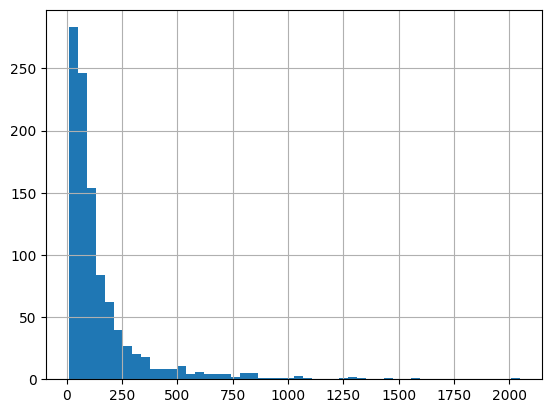

In [ ]:
# Следующий код выведет график длин предложений. Он поможет определить 
# оптимальную длину последовательности токенов, чтобы избежать разреженных векторов.


seq_len = [len(str(i).split()) for i in X]
pd.Series(seq_len).hist(bins = 50)

In [ ]:
X

0       Когда сожмешь ты снова руку,\nКоторая тебе дар...
1       Тебя ль я видел, милый друг?\nИли неверное то ...
2       Когда, к мечтательному миру\nСтремясь возвышен...
3       Его стихов пленительная сладость\nПройдет веко...
4       Бессмертною рукой раздавленный зоил,\nПозорног...
                              ...                        
1013    Друзья, поверьте, не грешно\nЛюбить с вином бо...
1014    А я ужель забыт тобою,\nМой брат по музе, мой ...
1015    Дорида, Дорида! любовью все дышит,\nВсе пьет н...
1016    Вчера вакхических друзей\nЯ посетил кружок вес...
1017    Не часто к нам слетает вдохновенье,\nИ краткий...
Name: text, Length: 1018, dtype: object

In [ ]:
# Для Bert не нужно проводить препроцессинг, поскольку он обучался на таких же грязных данных.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, test_size=0.15, random_state=0, shuffle=True)

train_text = X_train[:700].reset_index(drop=True)
train_labels = y_train[:700].reset_index(drop=True)
val_text = X_train[700:].reset_index(drop=True)
val_labels = y_train[700:].reset_index(drop=True)
test_text = X_test.reset_index(drop=True)
test_labels = y_test.reset_index(drop=True)

print(len(train_text), len(val_text), len(test_text), " = " ,len(train_text)+len(val_text)+len(test_text))

700 165 153  =  1018


In [ ]:
# Проверяем доступность устройства CUDA
bert = AutoModel.from_pretrained('DeepPavlov/rubert-base-cased-sentence')
bert_tokenizer = BertTokenizer.from_pretrained('DeepPavlov/rubert-base-cased-sentence')

In [ ]:
print(bert.config)

BertConfig {
  "_name_or_path": "DeepPavlov/rubert-base-cased-sentence",
  "architectures": [
    "BertModel"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.28.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 119547
}



In [ ]:
def process_data(data_text, labels):

  batch_size = 8
  max_seq_len = 512

  tokens = tokenizer.batch_encode_plus(
    data_text,
    max_length = max_seq_len,
    padding = True,
    truncation = True
  )

  data_seq = torch.tensor(tokens['input_ids'])
  data_mask = torch.tensor(tokens['attention_mask'])
  data_y = torch.tensor(labels.values)

  final_data = TensorDataset(data_seq, data_mask, data_y)
  sampler = RandomSampler(final_data)
  dataloader = DataLoader(final_data, sampler = sampler, batch_size = batch_size)

  return dataloader


# делаем датасет: данные + маска + метки
train_dataloader = process_data(train_text, train_labels)
val_dataloader = process_data(val_text, val_labels)


test_dataloader = process_data(test_text, test_labels)

In [ ]:
for param in bert.parameters():
    param.requires_grad = False

class BERT_Arch(nn.Module):
    
    def __init__(self, bert):
        super(BERT_Arch, self).__init__()
        self.bert = bert
        self.dropout = nn.Dropout(0.1)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(768,384)
        self.fc2 = nn.Linear(384,2)
        self.softmax = nn.LogSoftmax(dim = 1)
    
    def forward(self, sent_id, mask):
        _, cls_hs = self.bert(input_ids = sent_id, attention_mask = mask, return_dict = False)
        x = self.fc1(cls_hs)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

In [ ]:
bert_model = BERT_Arch(bert)

bert_model = bert_model.to(device)
from transformers import AdamW

optimizer = AdamW(bert_model.parameters(),
                  lr= 1e-3)


total_params = sum(p.numel() for p in bert_model.parameters())
trainable_params = sum(p.numel() for p in bert_model.parameters() if p.requires_grad)

print(f"Number of total parameters: {total_params}")
print(f"Number of trainable parameters: {trainable_params}")

Number of total parameters: 178149506
Number of trainable parameters: 296066


/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
bert_model

BERT_Arch(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine

In [ ]:
# боремся с дисбалансом классов

from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)

print(class_weights)
# [0.72818312 1.59561129]

weights = torch.tensor(class_weights, dtype = torch.float)
weights = weights.to(device)
cross_entropy = nn.CrossEntropyLoss()

[0.72818312 1.59561129]


In [ ]:
def train(bert_model, train_dataloader):
    bert_model.train()
    total_loss, total_accuracy = 0, 0
    total_preds = []
    
    for step, batch in tqdm(enumerate(train_dataloader), total = len(train_dataloader)):
        batch = [r.to(device) for r in batch]
        sent_id, mask, labels = batch
        bert_model.zero_grad()
        preds = bert_model(sent_id, mask)
        loss = cross_entropy(preds, labels)
        total_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        preds = preds.detach().cpu().numpy()
        total_preds.append(preds)
        
    avg_loss = total_loss / len(train_dataloader)
    total_preds = np.concatenate(total_preds, axis = 0)
    
    return avg_loss, total_preds

In [ ]:
def evaluate(bert_model, val_dataloader):
    bert_model.eval()
    total_loss, total_accuracy = 0,0
    total_preds = []

    for step, batch in tqdm(enumerate(val_dataloader), total = len(val_dataloader)):
        batch = [t.to(device) for t in batch]
        sent_id, mask, labels = batch
        
        with torch.no_grad():
            preds = bert_model(sent_id, mask)
            loss = cross_entropy(preds, labels)
            total_loss = total_loss + loss.item()
            preds = preds.detach().cpu().numpy()
            total_preds.append(preds)

    avg_loss = total_loss / len(val_dataloader)
    total_preds = np.concatenate(total_preds, axis = 0)
    return avg_loss, total_preds

In [ ]:
# Training loss: 0.564 - Validation loss: 0.593

best_valid_loss = float('inf')
epochs = 5

train_losses = []
valid_losses = []

for epoch in range(epochs):
    print('\n Epoch{:} / {:}'.format(epoch+1, epochs))
    
    train_loss, _ = train(bert_model, train_dataloader)
    valid_loss, _ = evaluate(bert_model, val_dataloader)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(bert_model.state_dict(), 'saved_weights.pt')
    
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    print(f'\nTraining loss: {train_loss:.3f}')
    print(f'Validation loss: {valid_loss:.3f}')


 Epoch1 / 5


100%|██████████| 21/21 [05:12<00:00, 14.88s/it]



Training loss: 0.627
Validation loss: 0.651

 Epoch2 / 5


100%|██████████| 21/21 [06:34<00:00, 18.80s/it]



Training loss: 0.624
Validation loss: 0.637

 Epoch3 / 5


  9%|▉         | 8/88 [02:45<27:33, 20.67s/it]


KeyboardInterrupt: ignored

In [ ]:
path = 'saved_weights.pt'
bert_model.load_state_dict(torch.load(path))

In [ ]:
import gc
gc.collect()
torch.cuda.empty_cache()

list_seq = np.array_split(test_seq, 50)
list_mask = np.array_split(test_mask, 50)


predictions = []
for num, elem in enumerate(list_seq):
    with torch.no_grad():
        preds = model(elem.to(device), list_mask[num].to(device))
        predictions.append(preds.detach().cpu().numpy())

In [ ]:
flat_preds = [item[1] for sublist in predictions for item in sublist]
flat_preds = (flat_preds - min(flat_preds)) / (max(flat_preds) - min(flat_preds))
test_df['confidence'] = flat_preds

In [ ]:
test_df['pred'] = test_df['confidence'].apply(lambda x: 1 if x>0.92 else 0)

print(classification_report(test_df['target'], test_df['pred']))

# **BERT ЦЕЛИКОМ**

In [ ]:
import pandas as pd
import numpy as np
import random
import torch
import transformers
import torch.nn as nn
from transformers import AutoModel, BertTokenizer, BertForSequenceClassification
from transformers import TrainingArguments, Trainer
from sklearn.metrics import classification_report, f1_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def seed_all(seed_value):
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value)
        torch.backends.cudnn.benchmark = True
        torch.backends.cudnn.deterministic = False
seed_all(42)

In [ ]:
model = BertForSequenceClassification.from_pretrained('DeepPavlov/rubert-base-cased-sentence', num_labels=2).to(device)
model_tokenizer = BertTokenizer.from_pretrained('DeepPavlov/rubert-base-cased-sentence')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased-sentence and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Данная модель принимает предложения длиной, не больше 512 токенов

# Для Bert не нужно проводить препроцессинг, поскольку он обучался на таких же грязных данных.
# данные те же самые 1018 текстов - внимательно с индексам после удаления некоторых записей в df !!!
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, test_size=0.15 , random_state=0, shuffle=True)

train_text = X_train[:700].reset_index(drop=True)
train_labels = y_train[:700].reset_index(drop=True)
val_text = X_train[700:].reset_index(drop=True)
val_labels = y_train[700:].reset_index(drop=True)
test_text = X_test.reset_index(drop=True)
test_labels = y_test.reset_index(drop=True)

print(len(train_text), len(val_text), len(test_text), " = " ,len(train_text)+len(val_text)+len(test_text))

700 165 153  =  1018


In [ ]:
max_seq_len = 512

tokens_train = model_tokenizer.batch_encode_plus(
    train_text,
    max_length = max_seq_len,
    padding = 'max_length',
    truncation = True
)
tokens_test = model_tokenizer.batch_encode_plus(
    test_text,
    max_length = max_seq_len,
    padding = 'max_length',
    truncation = True
)

In [ ]:
class Data(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
        
    def __getitem__(self, idx):
        print(idx)
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor([self.labels[idx]])
        return item
    def __len__(self):
        return len(self.labels)
    
train_dataset = Data(tokens_train, train_labels)
test_dataset = Data(tokens_test, test_labels)

In [ ]:
from sklearn.metrics import f1_score
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds)
    return {'F1': f1}

In [ ]:
# Ниже указаны все параметры, которые будут использоваться для обучения:

training_args = TrainingArguments(
    output_dir = './results', #Выходной каталог
    num_train_epochs = 3, #Кол-во эпох для обучения
    per_device_train_batch_size = 8, #Размер пакета для каждого устройства во время обучения
    per_device_eval_batch_size = 8, #Размер пакета для каждого устройства во время валидации
    weight_decay =0.01, #Понижение весов
    logging_dir = './logs', #Каталог для хранения журналов
    load_best_model_at_end = True, #Загружать ли лучшую модель после обучения
    learning_rate = 1e-5, #Скорость обучения
    evaluation_strategy ='epoch', #Валидация после каждой эпохи (можно сделать после конкретного кол-ва шагов)
    logging_strategy = 'epoch', #Логирование после каждой эпохи
    save_strategy = 'epoch', #Сохранение после каждой эпохи
    save_total_limit = 1,
    seed=21)

# Передача в trainer предообученную модель, tokenizer, данные для обучения, данные для валидации и способ расчета метрики:
# ДАННАЯ МОДЕЛЬ ИМЕЕТ 180 МИЛЛИОН ПАРАМЕТРОВ - НА МОЁМ УСТРОЙСТВЕ ОБУЧИТЬ 
# ТАКУЮ МОДЕЛЬ - НЕВОЗМОЖНО

trainer = Trainer(model=model,
                  tokenizer = model_tokenizer,
                  args = training_args,
                  train_dataset = train_dataset,
                  eval_dataset = test_dataset,
                  compute_metrics = compute_metrics)

In [ ]:
trainer.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


641
550
379
340
419
182
652
592


KeyboardInterrupt: ignored

In [ ]:
model_path = "fine-tune-bert"
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

In [ ]:
def get_prediction():
    test_pred = trainer.predict(test_dataset)
    labels = np.argmax(test_pred.predictions, axis = -1)
    return labels
pred = get_prediction()

In [ ]:
print(classification_report(test_labels, pred))
print(f1_score(test_labels, pred))

# **GPU**

In [ ]:
# памяти не хватает

print('GPU name: ', tf.config.experimental.list_physical_devices('GPU'))

GPU name:  []


In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    #print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)


In [ ]:
tf.config.set_soft_device_placement(True)
tf.debugging.set_log_device_placement(True)

## **НАЧАЛО РАБОТЫ С СЕТЯМИ - DATASETS**

In [ ]:
from sklearn.model_selection import train_test_split
# DATASETS
# 0 # 
# 1 # OHE_text_ds - shape(1018, 31507) - каждый текст представлен вектором из 0 и единиц в тех местах, если данное слово присутствует в тексте (BOW)
# 2 # keras_pad_norm_seq + glove_embedding_mat - shape(1018, 2047) + shape(13430, 300)
# 3 # w2v_data + ru_w2v_emb - shape(1018, 2047) + shape(19136, 300)
# 4 # text2vec_ds - shape(1018, 300)
# 5 # w2v_data + my_w2v_emb - shape(1018, 2047) + (19136, 300)
# 6 # keras_pad_seq + my_ft_emb - shape(1018, 2047) + (31507, 100)
# 7 # keras_pad_seq + ru_ft_emb - shape(1018, 2047) + (31507, 300)

# keras_pad_cut_seq

keras_pad_seq.shape


# **ПОЛНОСВЯЗНАЯ ОБЫЧНАЯ СЕТЬ НА D2V**

(814, 300) (814,)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 200)               60200     
                                                                 
 dropout_3 (Dropout)         (None, 200)               0         
                                                                 
 dense_7 (Dense)             (None, 200)               40200     
                                                                 
 dense_8 (Dense)             (None, 100)               20100     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 50)                5050      
                                                                 
 dense_10 (Dense)            (None, 

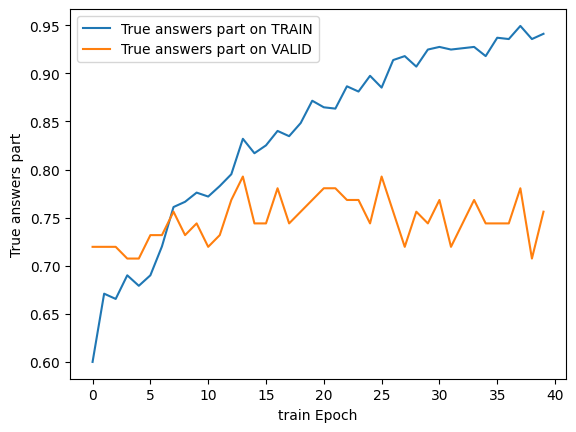

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(text2vec_ds, y, train_size=0.80, test_size=0.20, random_state=0)

dense_loss_model = "dense_loss_model"
models = checkpoint(models, dense_loss_model, monitor='val_loss')

d2v_dense_model = dense_nn_fit(X_train, y_train, models, dense_loss_model, epochs=40)

In [ ]:
nn_do_score(d2v_dense_model, X_test, y_test, threshold=0.4)

# Here:  {'ROC AUC': 0.6887417218543046, 'Balanced Accuracy': 0.6556916156441335, 'F1': 0.4962406015037593}

7/7 [==============================] - 0s 3ms/step
real:  Counter({0: 151, 1: 53})
preds:  Counter({0: 124, 1: 80})
Confusion matrix: 
[[104  47]
 [ 20  33]]
Here:  {'ROC AUC': 0.6887417218543046, 'Balanced Accuracy': 0.6556916156441335, 'F1': 0.4962406015037593}


(814, 31507) (814,)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 200)               6301600   
                                                                 
 dropout_5 (Dropout)         (None, 200)               0         
                                                                 
 dense_12 (Dense)            (None, 200)               40200     
                                                                 
 dense_13 (Dense)            (None, 100)               20100     
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_14 (Dense)            (None, 50)                5050      
                                                                 
 dense_15 (Dense)            (None

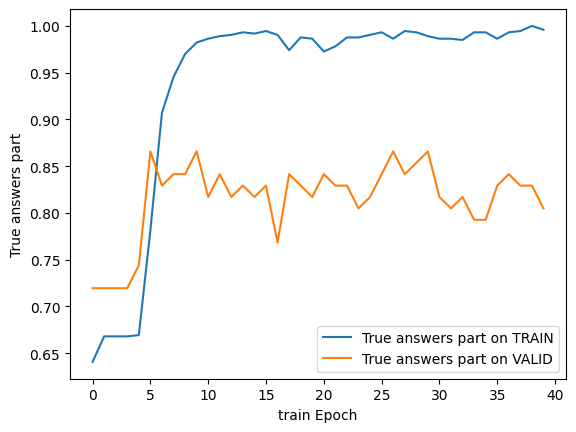

In [ ]:
# теперь попробуем OHE

X_train, X_test, y_train, y_test = train_test_split(OHE_text_ds, y, train_size=0.80, test_size=0.20, random_state=0)

dense_OHE_loss_model = "dense_OHE_loss_model"
models = checkpoint(models, dense_OHE_loss_model, monitor='val_loss')

OHE_dense_model = dense_nn_fit(X_train, y_train, models, dense_OHE_loss_model, epochs=40)

In [ ]:
nn_do_score(OHE_dense_model, X_test, y_test, threshold=0.4)

# Here:  {'ROC AUC': 0.7992002998875422, 'Balanced Accuracy': 0.6813694864425841, 'F1': 0.5283018867924528}

7/7 [==============================] - 0s 4ms/step
real:  Counter({0: 151, 1: 53})
preds:  Counter({0: 151, 1: 53})
Confusion matrix: 
[[126  25]
 [ 25  28]]
Here:  {'ROC AUC': 0.7992002998875422, 'Balanced Accuracy': 0.6813694864425841, 'F1': 0.5283018867924528}


# **LSTM RNN + GLOVE**

In [ ]:
# 2 # keras_pad_norm_seq + glove_embedding_mat - shape(1018, 2047) + shape(13430, 300)
from sklearn.model_selection import train_test_split

lstm_model_name = "lstm_loss_model"
models = checkpoint(models, lstm_model_name, monitor='val_loss')

X_train, X_test, y_train, y_test = train_test_split(keras_pad_norm_seq, y, train_size=0.9, test_size=0.1 , random_state=0)

lstm_model = lstm_nn_fit(X_train, y_train, glove_embedding_mat,
                         models, lstm_model_name, epochs=15, trainable=False)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embed-layer (Embedding)     (None, 2047, 300)         4029000   
                                                                 
 lstm1-layer (LSTM)          (None, 2047, 128)         219648    
                                                                 
 dropout_9 (Dropout)         (None, 2047, 128)         0         
                                                                 
 lstm2-layer (LSTM)          (None, 2047, 64)          49408     
                                                                 
 dropout_10 (Dropout)        (None, 2047, 64)          0         
                                                                 
 lstm3-layer (LSTM)          (None, 32)                12416     
                                                                 
 dense_18 (Dense)            (None, 16)               

KeyboardInterrupt: ignored

In [ ]:
# evaluate score 
# 0 = all messages are logged (default behavior)
# 1 = INFO messages are not printed
# 2 = INFO and WARNING messages are not printed
# 3 = INFO, WARNING, and ERROR messages are not printed

nn_do_score(lstm_model, X_test, y_test, threshold=0.25)

# Here:  {'ROC AUC': 0.8751718105710359, 'Balanced Accuracy': 0.8248781706859927, 'F1': 0.7428571428571428}

7/7 [==============================] - 1s 67ms/step
real:  Counter({0: 151, 1: 53})
preds:  Counter({0: 152, 1: 52})
Confusion matrix: 
[[138  13]
 [ 14  39]]
Here:  {'ROC AUC': 0.8751718105710359, 'Balanced Accuracy': 0.8248781706859927, 'F1': 0.7428571428571428}


# ** LSTM + MY FASTTEXT **

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embed-layer (Embedding)     (None, 2047, 100)         3150700   
                                                                 
 lstm1-layer (LSTM)          (None, 2047, 128)         117248    
                                                                 
 dropout_11 (Dropout)        (None, 2047, 128)         0         
                                                                 
 lstm2-layer (LSTM)          (None, 2047, 64)          49408     
                                                                 
 dropout_12 (Dropout)        (None, 2047, 64)          0         
                                                                 
 lstm3-layer (LSTM)          (None, 32)                12416     
                                                                 
 dense_20 (Dense)            (None, 16)               

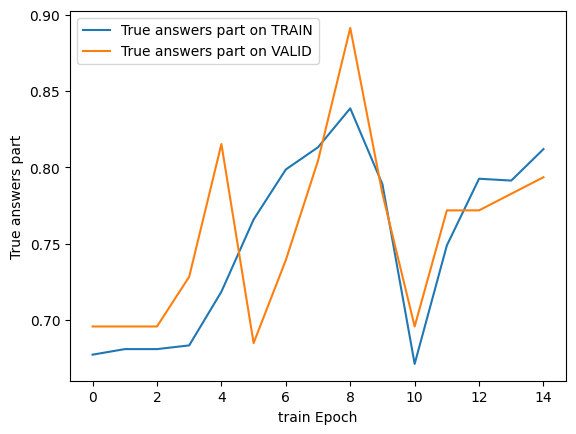

In [ ]:
# 6 # keras_pad_seq + my_ft_emb - shape(1018, 2047) + (31507, 100)
from sklearn.model_selection import train_test_split

lstm_ft_name = "lstm_ft_name"
models = checkpoint(models, lstm_ft_name, monitor='val_loss')

X_train, X_test, y_train, y_test = train_test_split(keras_pad_seq, y, train_size=0.9, test_size=0.1 , random_state=0)

lstm_ft_model = lstm_nn_fit(X_train, y_train, my_ft_emb,
                         models, lstm_ft_name, epochs=15, trainable=False)

In [ ]:
nn_do_score(lstm_ft_model, X_test, y_test, threshold=0.38)

# Here:  {'ROC AUC': 0.8751718105710359, 'Balanced Accuracy': 0.8248781706859927, 'F1': 0.7428571428571428}

4/4 [==============================] - 0s 96ms/step
real:  Counter({0: 74, 1: 28})
preds:  Counter({0: 77, 1: 25})
Confusion matrix: 
[[65  9]
 [12 16]]
Here:  {'ROC AUC': 0.7871621621621622, 'Balanced Accuracy': 0.7249034749034748, 'F1': 0.6037735849056605}


# **LSTM + MT W2V**

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embed-layer (Embedding)     (None, 2047, 300)         5740800   
                                                                 
 lstm1-layer (LSTM)          (None, 2047, 128)         219648    
                                                                 
 dropout_13 (Dropout)        (None, 2047, 128)         0         
                                                                 
 lstm2-layer (LSTM)          (None, 2047, 64)          49408     
                                                                 
 dropout_14 (Dropout)        (None, 2047, 64)          0         
                                                                 
 lstm3-layer (LSTM)          (None, 32)                12416     
                                                                 
 dense_22 (Dense)            (None, 16)               

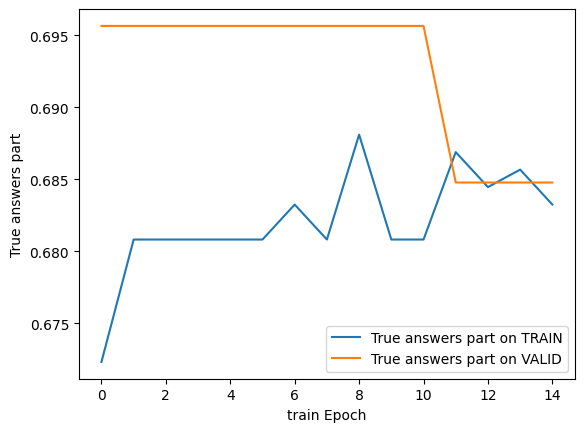

In [ ]:
# w2v_data + my_w2v_emb

from sklearn.model_selection import train_test_split

lstm_w2v_name = "lstm_w2v_name"
models = checkpoint(models, lstm_w2v_name, monitor='val_loss')

X_train, X_test, y_train, y_test = train_test_split(w2v_data, y, train_size=0.9, test_size=0.1 , random_state=0)

lstm_w2v_model = lstm_nn_fit(X_train, y_train, my_w2v_emb,
                         models, lstm_w2v_name, epochs=15, trainable=False)

In [ ]:
nn_do_score(lstm_w2v_model, X_test, y_test, threshold=0.38)

# Here:  {'ROC AUC': 0.8751718105710359, 'Balanced Accuracy': 0.8248781706859927, 'F1': 0.7428571428571428}

# **ConvNet - special + ru-ft**

In [ ]:
np.amax(emd_data)
emd_data.shape
y.shape

(1018,)

In [ ]:
from sklearn.model_selection import train_test_split

# 7 # keras_pad_seq + ru_ft_emb - shape(1018, 2047) + (31507, 300)

X_train, X_test, y_train, y_test = train_test_split(keras_pad_seq, y, train_size=0.80, test_size=0.20, random_state=0)

conv_ft_name = "conv_ft_name"
models = checkpoint(models, conv_ft_name, monitor='val_loss')

conv_net = ConvNet(X_train, y_train, ru_ft_emb, models, conv_ft_name, epochs=20,
                            trainable=False, extra_conv=False)

31507 2048 300
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 2048)]            0         
                                                                 
 embedding_2 (Embedding)     (None, 2048, 300)         9452100   
                                                                 
 conv1d_11 (Conv1D)          (None, 2046, 128)         115328    
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 682, 128)         0         
 g1D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 682, 128)          0         
                                                                 
 flatten_3 (Flatten)         (None, 87296)             0         
                                            

ValueError: ignored

In [ ]:
nn_do_score(lstm_w2v_model, X_test, y_test, threshold=0.38)

# Here:  {'ROC AUC': 0.8751718105710359, 'Balanced Accuracy': 0.8248781706859927, 'F1': 0.7428571428571428}

# **SIMPLE RNN на pretrained ft**

In [ ]:
# обучим модель simple rnn на простейшем представлении текстов 
# заметим важность размера вектора плотного представления слова, параметр слоя Embedding - output_dim 

# 7 # keras_pad_seq + ru_ft_emb - shape(1018, 2047) + (31507, 300)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(keras_pad_seq, y, train_size=0.80, test_size=0.20, random_state=0)

simple_rnn_ft_loss = "simple_rnn_ft_loss"
models = checkpoint(models, simple_rnn_ft_loss, monitor='val_loss')

rnn_model = simple_nn_fit(X_train, y_train, ru_ft_emb, models, simple_rnn_ft_loss, 
                          epochs=15, trainable=True)


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embed-layer (Embedding)     (None, 2047, 300)         9452100   
                                                                 
 simple_rnn (SimpleRNN)      (None, 2047, 64)          23360     
                                                                 
 dropout_18 (Dropout)        (None, 2047, 64)          0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 2047, 64)          8256      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dropout_19 (Dropout)        (None, 32)                0         
                                                                 
 dense_30 (Dense)            (None, 16)               

KeyboardInterrupt: ignored

In [ ]:
# имеем явное переобучение
# при использовании не предобученных embedding'ов заметно, что модель колеблеться от недообучения до переобучения

nn_do_score(rnn_model, X_test, y_test, threshold=0.4)

7/7 [==============================] - 4s 558ms/step
real:  Counter({0: 151, 1: 53})
preds:  Counter({0: 204})
Confusion matrix: 
[[151   0]
 [ 53   0]]
Here:  {'ROC AUC': 0.5121829314007247, 'Balanced Accuracy': 0.5, 'F1': 0.0}


# **GRU RNN + ru-w2v**

In [ ]:
# имеем явное переобучение

nn_do_score(gru_model, X_test, y_test, threshold=0.4)

# очевидно, что сами по себе эмбединги не были идеальные, многих слов не было, 
# что сказалось на конечном результате, в целом gensim для этого не удобен

7/7 [==============================] - 0s 61ms/step
real:  Counter({0: 151, 1: 53})
preds:  Counter({0: 127, 1: 77})
Confusion matrix: 
[[105  46]
 [ 22  31]]
Here:  {'ROC AUC': 0.6378857928276896, 'Balanced Accuracy': 0.6401349493939772, 'F1': 0.4769230769230769}


# **CNN RNN + ru-ft**

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 2047, 300)         9452100   
                                                                 
 conv1d_14 (Conv1D)          (None, 2041, 128)         268928    
                                                                 
 dropout_28 (Dropout)        (None, 2041, 128)         0         
                                                                 
 conv1d_15 (Conv1D)          (None, 2037, 128)         82048     
                                                                 
 conv1d_16 (Conv1D)          (None, 2031, 64)          57408     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                     

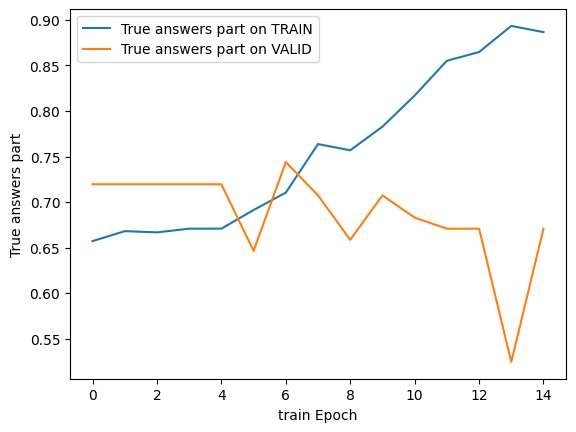

In [ ]:
# обучим модель gru rnn на glove представлении
# заметим важность размера вектора плотного представления слова, параметр слоя Embedding - output_dim 
# 7 # keras_pad_seq + ru_ft_emb - shape(1018, 2047) + (31507, 300)

from sklearn.model_selection import train_test_split

cnn2_model_name = 'cnn2_model_name'
models = checkpoint(models, cnn2_model_name, monitor='val_accuracy')

X_train, X_test, y_train, y_test = train_test_split(keras_pad_seq, y, train_size=0.80, test_size=0.20, random_state=0)

cnn2_model = cnn_fit(X_train, y_train, ru_ft_emb, models, cnn2_model_name, epochs=15,
                            trainable=False)

In [ ]:
# имеем явное переобучение

nn_do_score(cnn1_model, X_test, y_test, threshold=0.5)

7/7 [==============================] - 0s 17ms/step
real:  Counter({0: 151, 1: 53})
preds:  Counter({0: 144, 1: 60})
Confusion matrix: 
[[119  32]
 [ 25  28]]
Here:  {'ROC AUC': 0.716356366362614, 'Balanced Accuracy': 0.6581906784955642, 'F1': 0.49557522123893805}


# **!!!!!!!!!!!!!!!!!!!!!!!!!!!**

# HERE WE TRYING TENSOR FLOW SEM

In [ ]:
# при помощи tf реализуем реккурентную сеть с блоками lstm/gru/simplernn
# будем работать исключительно в терминах тензоров

import tensorflow as tf

# Step 1: Create a dataset

new_corpus = corpus.drop(["index", "name", "year"], axis=1)
target = new_corpus.pop('author')

ds_raw = tf.data.Dataset.from_tensor_slices(
    (new_corpus.values, y))

## inspection:
for ex in ds_raw.take(1):
    #print(ex[0])
    tf.print(ex[0])
    #tf.print(ex[0].numpy()[0][:50].decode('utf-8'), ex[1])
 

# reshuffle_each_iteration=True so we got different poems here below
'''

ds_raw = ds_raw.shuffle(len(target), reshuffle_each_iteration=True)
print()

for ex in ds_raw.take(3):
    #print(ex[0])
    tf.print(ex[0])
    tf.print(ex[1])
    #tf.print(ex[0].numpy()[0][:50].decode('utf-8'), ex[1])
    
print()
for ex in ds_raw.take(3):
    #print(ex[0])
    tf.print(ex[0])
    tf.print(ex[1])
    #tf.print(ex[0].numpy()[0][:50].decode('utf-8'), ex[1])
    
'''

In [ ]:
dataset = tf.data.Dataset.range(7)
dataset = dataset.shuffle(100, reshuffle_each_iteration=False)
#dataset = dataset.repeat(2)

for ex in dataset.take(10):
    print(ex)
    

In [ ]:
from collections import Counter
import tensorflow_datasets as tfds
from keras.metrics import TruePositives, FalsePositives, TrueNegatives, FalseNegatives, AUC, Precision, Recall
from keras.metrics import BinaryAccuracy

METRICS = [
      TruePositives(name='TP'),
      FalsePositives(name='FP'),
      TrueNegatives(name='TN'),
      FalseNegatives(name='FN'),
      AUC(name='auc'),
      Precision(name='precision'),
      Recall(name='recall'),
      BinaryAccuracy(name='acc')
]

# предобработка 
# откажемся от валидации ввиду малого набора данных
# что можно сказать, лучше данные предварительно обработать, а потом уже переводить их в тензоры, так проще!!!
def preprocess_datasets(
    ds_raw,
    max_seq_length=None,
    batch_size=32):
    
    ## Step 1: (creating a dataset)
    # Train/validaiton/test splits

    tf.random.set_seed(1)

    # reshuffle_each_iteration: (Optional.) 
    # A boolean, which if true indicates that the dataset 
    # should be pseudorandomly reshuffled each time it is iterated over. 
    ds_raw = ds_raw.shuffle(len(target), reshuffle_each_iteration=False)
    
    ds_raw_test = ds_raw.take(210)
    ds_raw_train_valid = ds_raw.skip(210) # 811 left
    #ds_raw_train = ds_raw_train_valid.take(661)
    #ds_raw_valid = ds_raw_train_valid.skip(661)

    ## Step 2: find unique tokens
    try:
        tokenizer = tfds.features.text.Tokenizer()
    except AttributeError:
        tokenizer = tfds.deprecated.text.Tokenizer()
    
    token_counts = Counter()

    # max_seq_length - ограничивает длинну возможной последовательности
    for example in ds_raw_train_valid:
        tokens = tokenizer.tokenize(example[0].numpy()[0])
        if max_seq_length is not None:
            tokens = tokens[-max_seq_length:]
        token_counts.update(tokens)
    
    VOCAB_SIZE = len(token_counts)
    print('Vocab-size:', VOCAB_SIZE)

    ## Step 3: encoding the texts
    try:
        encoder = tfds.features.text.TokenTextEncoder(token_counts)
    except AttributeError:
        encoder = tfds.deprecated.text.TokenTextEncoder(token_counts)
    
    # окей словарь получили, теперь по отдельности сделаем каджую поэму
    # аналогично обрубаем стих если его длинна больше max_seq_length
    def encode(text_tensor, label):
        text = text_tensor.numpy()[0]
        encoded_text = encoder.encode(text)
        if max_seq_length is not None:
            encoded_text = encoded_text[-max_seq_length:]
        return encoded_text, label

    # обёртка: Эта функция позволяет выражать вычисления в графе TensorFlow в виде функций Python
    def encode_map_fn(text, label):
        return tf.py_function(encode, inp=[text, label], 
                              Tout=(tf.int64, tf.int64))

    
    ds_train = ds_raw_train_valid.map(encode_map_fn)
    #ds_valid = ds_raw_valid.map(encode_map_fn)
    ds_test = ds_raw_test.map(encode_map_fn)

    # какой то вектор будет длиннее другого, поэтому заполним их нулями (заполнитель)
    ## Step 4: batching the datasets
    train_data = ds_train.padded_batch(
        batch_size, padded_shapes=([-1],[]))

 #   valid_data = ds_valid.padded_batch(
 #       batch_size, padded_shapes=([-1],[]))

    test_data = ds_test.padded_batch(
        batch_size, padded_shapes=([-1],[]))

    return (train_data, test_data, VOCAB_SIZE)

In [ ]:
from tensorflow.keras.layers import Bidirectional

batch_size = 32
embedding_dim = 20
max_seq_length = None

train_data, test_data, n = preprocess_datasets(ds_raw, 
    max_seq_length=max_seq_length, 
    batch_size=batch_size
)

for i in train_data.take(2):
    tf.print(len(i[0]))
    tf.print(i[0])

In [ ]:
# оцениваем работу нейронки (когда работаем с тензорами TF ВСЁ немного по-другому)

def score_tf_nn(model, test_data):
    
    test_results = lstm_model.evaluate(test_data)
    
    try:
        # b_a = (((TP/(TP+FN)+(TN/(TN+FP))) / 2
        balanced_accuracy = (((test_results[1]/(test_results[1]+test_results[4])
                               +(test_results[3]/(test_results[3]+test_results[2])))))/2
    except ZeroDivisionError:
        balanced_accuracy = 0
    
    try:
        #f1_score = 2 * (precision * recall) / (precision + recall)
        f1_score = 2*(test_results[6]*test_results[7])/(test_results[6]+test_results[7])
        
    except ZeroDivisionError:
        f1_score = 0

    return {"ROC AUC": test_results[5],
            "Balanced Accuracy": balanced_accuracy,
            "F1": f1_score}

In [ ]:
# используем свёртку для анализа последовательностей
# неудачно

from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D, GlobalMaxPooling1D
from keras.models import Sequential

def cnn_fit(train_data, n):
    
    seq_length = 64
    embedding_dim = 20
    vocab_size = n + 2

    tf.random.set_seed(1)
    
    cnn_model = Sequential()
    
    cnn_model.add(Embedding(input_dim=vocab_size, 
                            output_dim=embedding_dim, 
                            input_length=64))
    cnn_model.add(Dropout(0.2))
    cnn_model.add(Conv1D(64, 3, activation='relu'))
    cnn_model.add(GlobalMaxPooling1D())
    cnn_model.add(Dense(32, activation='relu'))
    #cnn_model.add(Conv1D(64, 3, activation='relu'))
    #cnn_model.add(MaxPooling1D(3))
    #cnn_model.add(Conv1D(128, 3, activation='relu'))
    #cnn_model.add(Conv1D(128, 3, activation='relu'))
    #cnn_model.add(GlobalAveragePooling1D())
    cnn_model.add(Dropout(0.2))
    cnn_model.add(Dense(1, activation='sigmoid'))
    
    cnn_model.summary()

    cnn_model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=METRICS)
    
    history = cnn_model.fit(
        train_data, 
        #validation_data=valid_data, 
        epochs=15)
    
    return cnn_model
    

In [ ]:
## evaluate on the test data
cnn_model = cnn_fit(train_data, token_counts)

In [ ]:
score_tf_nn(cnn_model, test_data)

In [ ]:
## An example of building a RNN model
## with LSTM layer


from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout, Activation, Dense, LSTM
from keras.layers import Embedding
from keras.layers import Bidirectional


def lstm_nn_fit(train_data, token_counts):
    
    embedding_dim = 50
    vocab_size = len(token_counts) + 2

    tf.random.set_seed(1)

    ## build the model
    bi_lstm_model = tf.keras.Sequential([
        Embedding(
            input_dim=vocab_size,
            output_dim=embedding_dim,
            name='embed-layer'),
    
        #LSTM(128, name='lstm1-layer', return_sequences=True), 
        Dropout(0.4),
        LSTM(64, name='lstm2-layer', return_sequences=True),
        Dropout(0.6),
        LSTM(32, name='lstm3-layer'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    bi_lstm_model.summary()

    ## compile and train:
    bi_lstm_model.compile(
        optimizer=tf.keras.optimizers.Adam(1e-3),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=METRICS)

    history = bi_lstm_model.fit(
        train_data, 
        #validation_data=valid_data, 
        epochs=10)
    
    return bi_lstm_model
    

In [ ]:
## evaluate on the test data
lstm_model = lstm_nn_fit(train_data, token_counts)

In [ ]:
score_tf_nn(lstm_model, test_data)

In [ ]:
# на будущее 
# lets use huggingface (transformers)

!pip install transformers sentencepiece

from transformers import pipeline
# для автоматизации шагов обработки текста

classifier = pipeline("text-classification", "papluca/xlm-roberta-base-language-detection")


In [ ]:
# run this cell to clear all data without restarting a kernel

%reset

for name in dir():
    if not name.startswith('_'):
        del globals()[name]

# Garbage Collector - use it like gc.collect()
import gc
import keras

# Custom Callback To Include in Callbacks List At Training Time
class GarbageCollectorCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        gc.collect()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
